# This script is meant to take .npz files and create data visualizations

In [1]:
# Import Standard Libraries
import numpy as np
import os
import datetime
from matplotlib import pyplot as plt
import scipy

In [2]:
def get_drug_times(batch_id: str, drug_name: str, start_delay=datetime.timedelta(), length=None):

    # start_delay = datetime.timedelta of delay from "drug recording start time"
    # length = datetime.timedelta of length of recording from start time (accounting to the delay)
    drug_times = {
        "O9-12":{
            "Control":[datetime.datetime(2023, 5, 3, 17, 33), datetime.datetime(2023, 5, 18, 12, 10)],
            "4-AP":[datetime.datetime(2023, 5, 18, 12, 25), datetime.datetime(2023, 5, 18, 18, 15)],
            "No Drug":[datetime.datetime(2023, 5, 18, 18, 30), datetime.datetime(2023, 5, 19, 9, 15)],
            "Bicuculline":[datetime.datetime(2023, 5, 19, 9, 30), datetime.datetime(2023, 5, 19, 15, 25)],
            "Tetrodotoxin":[datetime.datetime(2023, 5, 19, 15, 40), datetime.datetime(2023, 5, 19, 21, 40)],
        },
        "O13-16":{
            "Control":[datetime.datetime(2023, 5, 25, 19, 18), datetime.datetime(2023, 6, 8, 18, 50)],
            "4-AP":[datetime.datetime(2023, 6, 8, 19, 5), datetime.datetime(2023, 6, 8, 23, 35)],
            "No Drug":[datetime.datetime(2023, 6, 8, 23, 50), datetime.datetime(2023, 6, 9, 10, 5)],
            "Bicuculline":[datetime.datetime(2023, 6, 9, 10, 20), datetime.datetime(2023, 6, 9, 15, 25)],
            "Tetrodotoxin":[datetime.datetime(2023, 6, 9, 15, 40), datetime.datetime(2023, 6, 9, 21, 40)],
        },
        "O17-20":{
            "Control":[datetime.datetime(2023, 6, 22, 15, 40), datetime.datetime(2023, 7, 12, 12, 55)],
            "4-AP":[datetime.datetime(2023, 7, 12, 13, 10), datetime.datetime(2023, 7, 12, 18, 10)],
            "No Drug":[datetime.datetime(2023, 7, 12, 18, 25), datetime.datetime(2023, 7, 13, 12, 20)],
            "Bicuculline":[datetime.datetime(2023, 7, 13, 12, 35), datetime.datetime(2023, 7, 13, 18, 0)],
            "Tetrodotoxin":[datetime.datetime(2023, 7, 13, 18, 15), datetime.datetime(2023, 7, 14, 0, 15)],
        },
        "O21-24":{
            "Control":[datetime.datetime(2024, 7, 1, 13, 53), datetime.datetime(2024, 7, 9, 13, 25)],
            "4-AP":[datetime.datetime(2024, 7, 9, 13, 45), datetime.datetime(2024, 7, 9, 17, 45)],
            "No Drug":[datetime.datetime(2024, 7, 9, 18, 0), datetime.datetime(2024, 7, 10, 10, 35)],
            "Bicuculline":[datetime.datetime(2024, 7, 10, 10, 50), datetime.datetime(2024, 7, 10, 15, 50)],
            "Tetrodotoxin":[datetime.datetime(2024, 7, 10, 16, 5), datetime.datetime(2024, 7, 10, 22, 5)],
        },
        "O25-28":{
            "Control":[datetime.datetime(2024, 10, 1, 16, 26), datetime.datetime(2024, 10, 14, 12, 50)],
            "4-AP":[datetime.datetime(2024, 10, 14, 13, 5), datetime.datetime(2024, 10, 14, 18, 0)],
            "No Drug":[datetime.datetime(2024, 10, 14, 18, 25), datetime.datetime(2024, 10, 15, 13, 15)],
            "Bicuculline":[datetime.datetime(2024, 10, 15, 13, 30), datetime.datetime(2024, 10, 15, 18, 25)],
            "Tetrodotoxin":[datetime.datetime(2024, 10, 15, 18, 35), datetime.datetime(2024, 10, 16, 0, 35)],
        },
    }

    start_time, end_time = drug_times[batch_id][drug_name]

    # Apply Delay
    start_time += start_delay

    # Segment Recording based on length (if given)
    if length is not None:
        end_time = start_time + length

    return start_time, end_time

def make_session_dict(batch_ids, drug_names, start_delay=datetime.timedelta(), length=None):

    session = {}

    for batch in batch_ids:
        session[batch] = {}

        for drug in drug_names:
            session[batch][drug] = get_drug_times(batch, drug, start_delay, length)
    
    return session

def get_batch_folder(session_times, processed_data_dir):
    # Get folder (stored in processed_date_dir) which contains session times

    start_time, end_time = session_times
    batch_folders = os.listdir(processed_data_dir)

    for batch_folder in batch_folders:
        
        # skip iteration is batch_folder isn't a directory
        if not os.path.isdir(os.path.join(processed_data_dir, batch_folder)):
            continue

        batch_files = os.listdir(os.path.join(processed_data_dir, batch_folder))

        file_format = '%y%m%d.npz'
        batch_dates = [datetime.datetime.strptime(file, file_format).date() for file in batch_files]

        if start_time.date() in batch_dates and end_time.date() in batch_dates:
            return batch_folder
    
    raise Exception("One or both of session time dates not found in processed_data_dir")

def get_time_array(type_str = False):

    # Create an empty array to store time objects
    time_array = np.empty(24 * 60, dtype=object)
    
    # Fill the array with time objects for each minute of the day
    for hour in range(24):
        for minute in range(60):
            index = hour * 60 + minute
            time_object = datetime.time(hour=hour, minute=minute)

            if type_str:
                time_array[index] = time_object.strftime("%H%M")
            else:
                time_array[index] = time_object
    
    return time_array

def get_organoid_ids(batch):

    organoid_ids = {
        "O9-12": ["O9", "O10", "O11", "O12"],
        "O13-16": ["O13", "O14", "O15", "O16"],
        "O17-20": ["O17", "O18", "O19", "O20"],
        "O21-24": ["O21", "O22", "O23", "O24"],
        "O25-28": ["O25", "O26", "O27", "O28"]
    }

    return organoid_ids[batch]

In [35]:
# Create a Function to Fetch all data between session times in a session dictionary
def fetch_data(session_times: tuple, processed_data_dir):

    # IMPEDANCE FILTER
    I1 = 50000
    I2 = 2000000

    # find all recorded data between session times
    start_time, end_time = session_times

    # get batch folder (in processed_data_dir)
    batch_folder = get_batch_folder(session_times=session_times, processed_data_dir=processed_data_dir)

    # get time array (all minutes across a day)
    time_array = get_time_array()

    # get files for wanted batch recording (sort by date)
    batch_files = np.sort(np.array(os.listdir(os.path.join(processed_data_dir, batch_folder))))

    # get dates for batch files
    file_format = '%y%m%d.npz'
    batch_dates = np.array([datetime.datetime.strptime(file, file_format).date() for file in batch_files])

    # get files for dates within session_times 
    files = batch_files[(start_time.date() <= batch_dates) & (batch_dates <= end_time.date())]
    
    for file in files:
        print(f"Processing {file}")
        
        # extract data from file
        file_dict = dict(np.load(os.path.join(processed_data_dir, batch_folder, file)))

        # SOMETHING TO FIX LATER
        # I don't like having time = axis0, I'm changing the order to 4 x 32 x 1440 x 10
        file_dict["data"] = np.transpose(file_dict["data"], (1, 2, 0, 3))
        file_dict["rms_mask"] = np.transpose(file_dict["rms_mask"], (1, 2, 0))

        file_data = file_dict["data"]

        # create (4 x 32 x 1440 x 4) logical array of all masks [minute, rms, inside, impedance]
        file_mask = np.stack(
            (
                np.tile(file_dict["minute_mask"][np.newaxis, np.newaxis, :], (4, 32, 1)), # 1440 -> 4 x 32 x 1440
                file_dict["rms_mask"], # 4 x 32 x 1440
                np.tile(file_dict["elec_inside_mask"][:, :, np.newaxis], (1, 1, 1440)), # 4 x 32 -> 4 x 32 x 1440
                np.tile(((I1 <= file_dict["impedance_values"]) & (file_dict["impedance_values"] <= I2))[:, :, np.newaxis], (1, 1, 1440)) # 4 x 32 -> 4 x 32 x 1440
            ),
            axis = -1
        )

        # time indexing (baseed on start and end time)
        t_idx = np.full(1440, True, dtype=bool)
        if file == files[0]:
            # remove data before start time
            t_idx = t_idx & (time_array>=start_time.time())
        
        if file == files[-1]:
            # remove data afteer end time
            t_idx = t_idx & (time_array<=end_time.time())
        file_data = file_data[:, :, t_idx, :]
        file_mask = file_mask[:, :, t_idx, :]       

        # concatenate file array with session array
        if file == files[0]:
            # initialize array
            data = file_data
            mask = file_mask

        else:
            # concatenate array (along time (1440) axis)
            data = np.concatenate((data, file_data), axis=2)
            mask = np.concatenate((mask, file_mask), axis=2)
        
        # Print summary values (mask)
        minute_mask = file_mask[0,0,:,0]
        print(f"{np.sum(minute_mask)}/{file_mask.shape[2]} minutes sucessfully recorded")
        
        print(f"{np.round((np.sum(file_mask[:,:,:,1])/np.size(file_mask[:,:,minute_mask,1]))*100, decimals=2)}% of data in valid rms range")
        print(f"{np.sum(file_mask[:,:,0,2])}/128 electrodes inside organoids")
        print(f"{np.sum(file_mask[:,:,0,3])}/128 electrodes in valid impedance range")
        print(f"{np.round((np.sum(np.all(file_mask, axis=3))/np.size(file_mask[:,:,:,0]))*100, decimals=2)}% of data pass all filters")
        print("")
  

    return data, mask

def fetch_impedance_values(session_times: dict, processed_data_dir):
    
    # find all recorded data between session times
    start_time, end_time = session_times

    # get batch folder (in processed_data_dir)
    batch_folder = get_batch_folder(session_times=session_times, processed_data_dir=processed_data_dir)


    # get files for wanted batch recording (sort by date)
    batch_files = np.sort(np.array(os.listdir(os.path.join(processed_data_dir, batch_folder))))

    # get dates for batch files
    file_format = '%y%m%d.npz'
    batch_dates = np.array([datetime.datetime.strptime(file, file_format).date() for file in batch_files])

    # get files for dates within session_times 
    files = batch_files[(start_time.date() <= batch_dates) & (batch_dates <= end_time.date())]

    data = []
    for file in files:
        print(f"Processing {file}")

        file_dict = dict(np.load(os.path.join(processed_data_dir, batch_folder, file)))
        
        impedance_values = file_dict["impedance_values"]

        # concatenate file array with session array
        data.append(impedance_values)
    
    return np.stack(data, axis=-1)


In [33]:
def get_data_dict(session_dict: dict, processed_data_dir, get_impedance_values=False):

    # return a dictionary organized the same way as the session_dict replacing the session times with the data between them

    data_dict = {}

    for key, value in session_dict.items():
        
        print(f"{key}:")
        
        # account for different number of layers throughout dict
        if isinstance(value, dict):
            data_dict[key] = get_data_dict(value, processed_data_dir, get_impedance_values=get_impedance_values)

        # once reached the "value" layer (get data)
        if isinstance(value, tuple):
            
            if get_impedance_values:
                data_dict[key] = fetch_impedance_values(session_times=value, processed_data_dir=processed_data_dir)

            else:
                data_dict[key] = fetch_data(session_times=value, processed_data_dir=processed_data_dir)

    
    return data_dict
            

In [5]:
def get_total_mask(mask_array, minute=True, rms=True, elec_inside=True, impedance=True):
    
    filter_idx = [minute, rms, elec_inside, impedance]
    return np.all(mask_array[:,:,:,filter_idx], axis=3)

def apply_mask(data, mask):

    if not data.shape == mask.shape:
        raise IndexError("Size of data needs to match the size of mask")
    
    array = np.full(data.shape, np.nan)
    array[mask] = data[mask]

    return array
    


In [6]:
# Filter Line Plots (time vs valid channels)

# input = 2 layer dict [batch, days]
# output = 4x1 figure (each organoid) with drug conditions labeled on x-axis

# make session dict
batch_ids = ["O9-12", "O13-16", "O17-20", "O21-24", "O25-28"]

session = {}
for batch_id in batch_ids:
    session[batch_id] = {}

    recording_start = get_drug_times(batch_id, "Control")[0]
    recording_end = get_drug_times(batch_id, "Tetrodotoxin")[1]

    # Iterate through the range of dates
    date_list = []
    date = recording_start.date()
    while date <= recording_end.date():
        # Append the date part of the datetime object to the list
        date_list.append(date)
        # Increment the current datetime by one day
        date += datetime.timedelta(days=1)
    
    for date in date_list:

        if date == date_list[0]:
            session[batch_id][date] = (recording_start, recording_start+datetime.timedelta(hours=1))

        elif date == date_list[-1]:
            session[batch_id][date] = (recording_end-datetime.timedelta(hours=1), recording_end)

        else:
            session[batch_id][date] = (datetime.datetime.combine(date, datetime.time(hour=2, minute=0)), datetime.datetime.combine(date, datetime.time(hour=3, minute=0)))
    



In [ ]:
processed_data_dir = os.path.join(os.getcwd(), "processed_data")
data = get_data_dict(session, processed_data_dir)

O9-12:
2023-05-03:
Processing 230503.npz
61/61 minutes sucessfully recorded
89.61% of data in valid rms range
82/128 electrodes inside organoids
57/128 electrodes in valid impedance range
25.58% of data pass all filters

2023-05-04:
Processing 230504.npz
61/61 minutes sucessfully recorded
79.03% of data in valid rms range
82/128 electrodes inside organoids
57/128 electrodes in valid impedance range
21.94% of data pass all filters

2023-05-05:
Processing 230505.npz
61/61 minutes sucessfully recorded
90.78% of data in valid rms range
82/128 electrodes inside organoids
57/128 electrodes in valid impedance range
22.53% of data pass all filters

2023-05-06:
Processing 230506.npz
61/61 minutes sucessfully recorded
75.77% of data in valid rms range
82/128 electrodes inside organoids
57/128 electrodes in valid impedance range
18.74% of data pass all filters

2023-05-07:
Processing 230507.npz
61/61 minutes sucessfully recorded
75.78% of data in valid rms range
82/128 electrodes inside organoids

/var/folders/kj/qkc_fs3j2rx6nfm3mpsqdf940000gn/T/ipykernel_2534/1724973464.py:78: RuntimeWarning: invalid value encountered in scalar divide
  print(f"{np.round((np.sum(file_mask[:,:,:,1])/np.size(file_mask[:,:,minute_mask,1]))*100, decimals=2)}% of data in valid rms range")


61/61 minutes sucessfully recorded
72.61% of data in valid rms range
82/128 electrodes inside organoids
57/128 electrodes in valid impedance range
18.57% of data pass all filters

2023-05-12:
Processing 230512.npz
61/61 minutes sucessfully recorded
70.31% of data in valid rms range
82/128 electrodes inside organoids
57/128 electrodes in valid impedance range
18.75% of data pass all filters

2023-05-13:
Processing 230513.npz
61/61 minutes sucessfully recorded
70.36% of data in valid rms range
82/128 electrodes inside organoids
57/128 electrodes in valid impedance range
18.75% of data pass all filters

2023-05-14:
Processing 230514.npz
61/61 minutes sucessfully recorded
69.53% of data in valid rms range
82/128 electrodes inside organoids
57/128 electrodes in valid impedance range
18.75% of data pass all filters

2023-05-15:
Processing 230515.npz
61/61 minutes sucessfully recorded
69.53% of data in valid rms range
82/128 electrodes inside organoids
57/128 electrodes in valid impedance ran

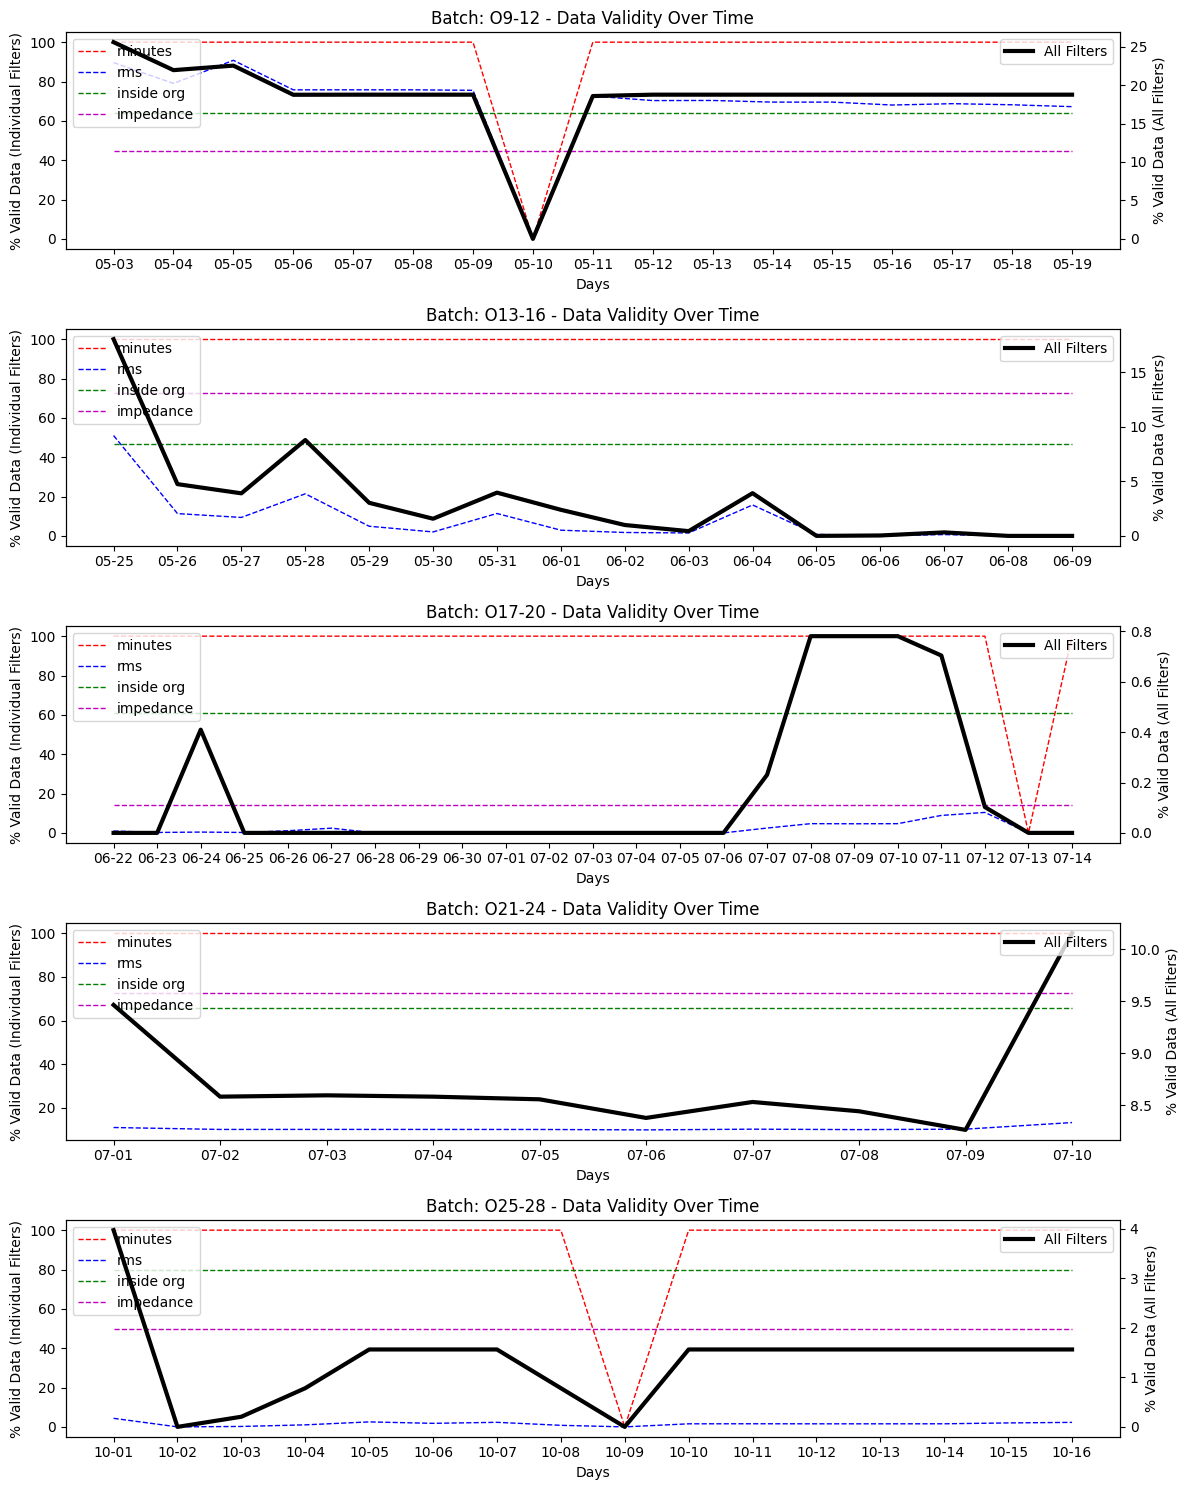

In [281]:
# Filter Line Plots (time vs valid channels)
# input = 2 layer dict [batch, days]
# output = Bx1 figure (days vs % data which passes)
F = 5
B = len(data)
filter_names = ["minutes", "rms", "inside org", "impedance"]
colors = ['r', 'b', 'g', 'm']
# Create a figure with Bx1 subplots
fig, axs = plt.subplots(B, 1, figsize=(12, 3*B))

for i, (batch, batch_dict) in enumerate(data.items()):

    # Need 
    # day vector
    # minute mask / rms mask / inside mask / impedance mask / all mask
    days = []
    D = len(batch_dict)
    batch_data = np.zeros((F, D))
    for d, (day, (_, mask)) in enumerate(batch_dict.items()): # d = day index

        total_data = np.size(mask[:,:,:,0])

        mask_list = []
        for f in range(F-1): # f = filter index

            mask_f = mask[:,:,:,f]
            batch_data[f, d] = (np.sum(mask_f) / total_data) * 100 # % of valid data for that filter

        batch_data[F-1, d] = (np.sum(np.all(mask, axis=3)) / total_data) * 100 # % of valid data for all filters
        days.append(day.strftime("%m-%d"))

    # Create a subplot for this batch
    ax1 = axs[i]
    
    # Plot all but the last line on ax1
    for f in range(F - 1):
        ax1.plot(days, batch_data[f], color=colors[f], label=filter_names[f], linewidth=1, linestyle='dashed')

    # Set labels and title for ax1
    ax1.set_xlabel('Days')
    ax1.set_ylabel('% Valid Data (Individual Filters)')
    ax1.set_title(f'Batch: {batch} - Data Validity Over Time')
    ax1.legend(loc='upper left')

    # Create a secondary axis for the last line
    ax2 = ax1.twinx()

    # Plot the last line on ax2
    ax2.plot(days, batch_data[F-1], color='k', label='All Filters', linewidth=3)

    # Set labels for ax2
    ax2.set_ylabel('% Valid Data (All Filters)')
    ax2.legend(loc='upper right')

# Layout so plots do not overlap
fig.tight_layout()

# Show the plot
plt.show()




# Investigate Drug Reactions

In [ ]:
# Make Session Dict
batch_ids = ["O9-12", "O13-16", "O17-20", "O21-24", "O25-28"]
drug_names = ["Control", "4-AP", "No Drug", "Bicuculline", "Tetrodotoxin"]

session = make_session_dict(
    batch_ids=batch_ids, 
    drug_names=drug_names,
    length=datetime.timedelta(hours=5)
    )


In [6]:
# Make Session Dict
batch_ids = ["O9-12", "O13-16", "O17-20", "O21-24", "O25-28"]
drug_names = ["Control"]

session = make_session_dict(
    batch_ids=batch_ids, 
    drug_names=drug_names,
    start_delay=datetime.timedelta(hours=6),
    length=datetime.timedelta(days=3),
    )

In [7]:
processed_data_dir = os.path.join(os.getcwd(), "processed_data")
data = get_data_dict(session, processed_data_dir)


O9-12:
Control:
Processing 230503.npz
27/27 minutes sucessfully recorded
79.54% of data in valid rms range
82/128 electrodes inside organoids
57/128 electrodes in valid impedance range
22.48% of data pass all filters

Processing 230504.npz
1440/1440 minutes sucessfully recorded
87.82% of data in valid rms range
82/128 electrodes inside organoids
57/128 electrodes in valid impedance range
22.88% of data pass all filters

Processing 230505.npz
1440/1440 minutes sucessfully recorded
80.26% of data in valid rms range
82/128 electrodes inside organoids
57/128 electrodes in valid impedance range
20.05% of data pass all filters

Processing 230506.npz
1414/1414 minutes sucessfully recorded
77.06% of data in valid rms range
82/128 electrodes inside organoids
57/128 electrodes in valid impedance range
19.05% of data pass all filters

O13-16:
Control:
Processing 230526.npz
1362/1362 minutes sucessfully recorded
10.93% of data in valid rms range
60/128 electrodes inside organoids
93/128 electrodes

/var/folders/kj/qkc_fs3j2rx6nfm3mpsqdf940000gn/T/ipykernel_70579/3387682875.py:29: RuntimeWarning: Mean of empty slice
  average_data = np.nanmean(drug_data, axis=1)


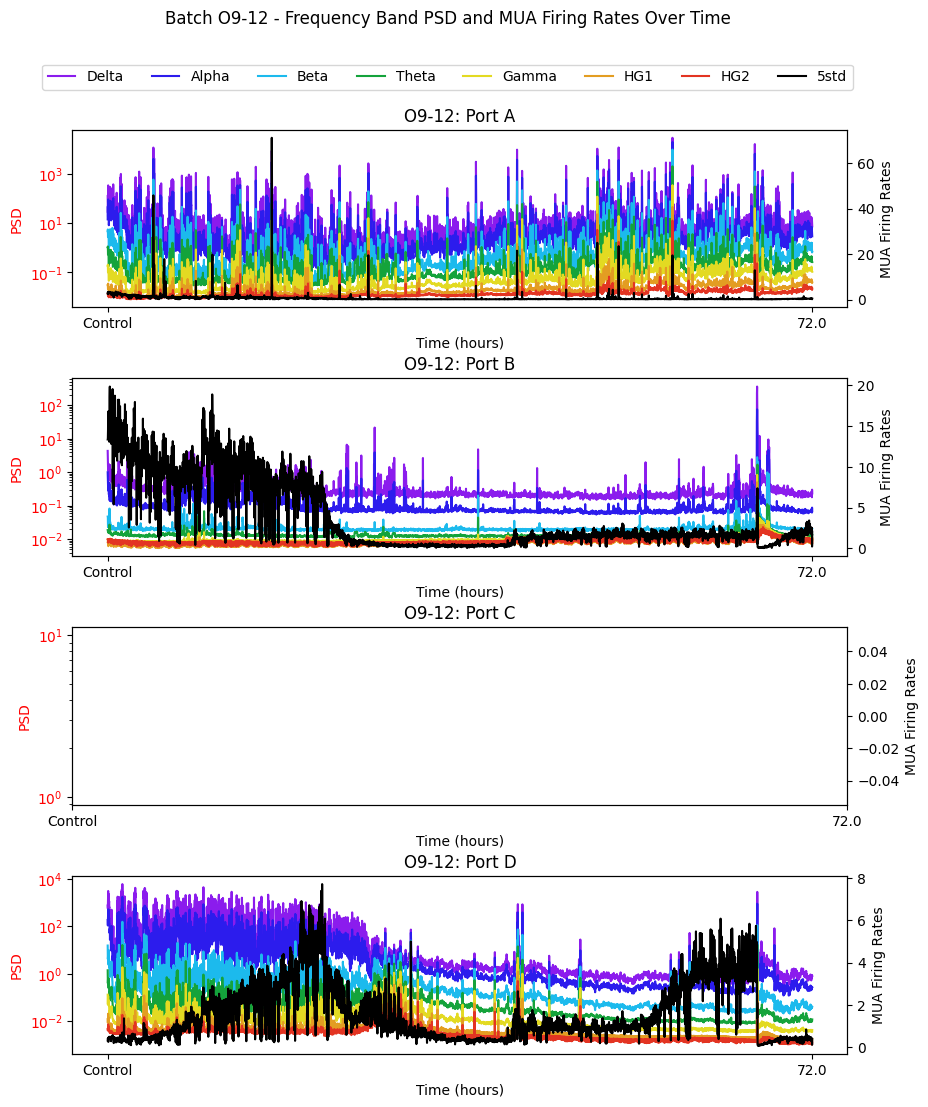

/var/folders/kj/qkc_fs3j2rx6nfm3mpsqdf940000gn/T/ipykernel_70579/3387682875.py:94: RuntimeWarning: Mean of empty slice
  hg1_data[batch] = np.nanmean(batch_data[:,:,6], axis=1)
/var/folders/kj/qkc_fs3j2rx6nfm3mpsqdf940000gn/T/ipykernel_70579/3387682875.py:29: RuntimeWarning: Mean of empty slice
  average_data = np.nanmean(drug_data, axis=1)


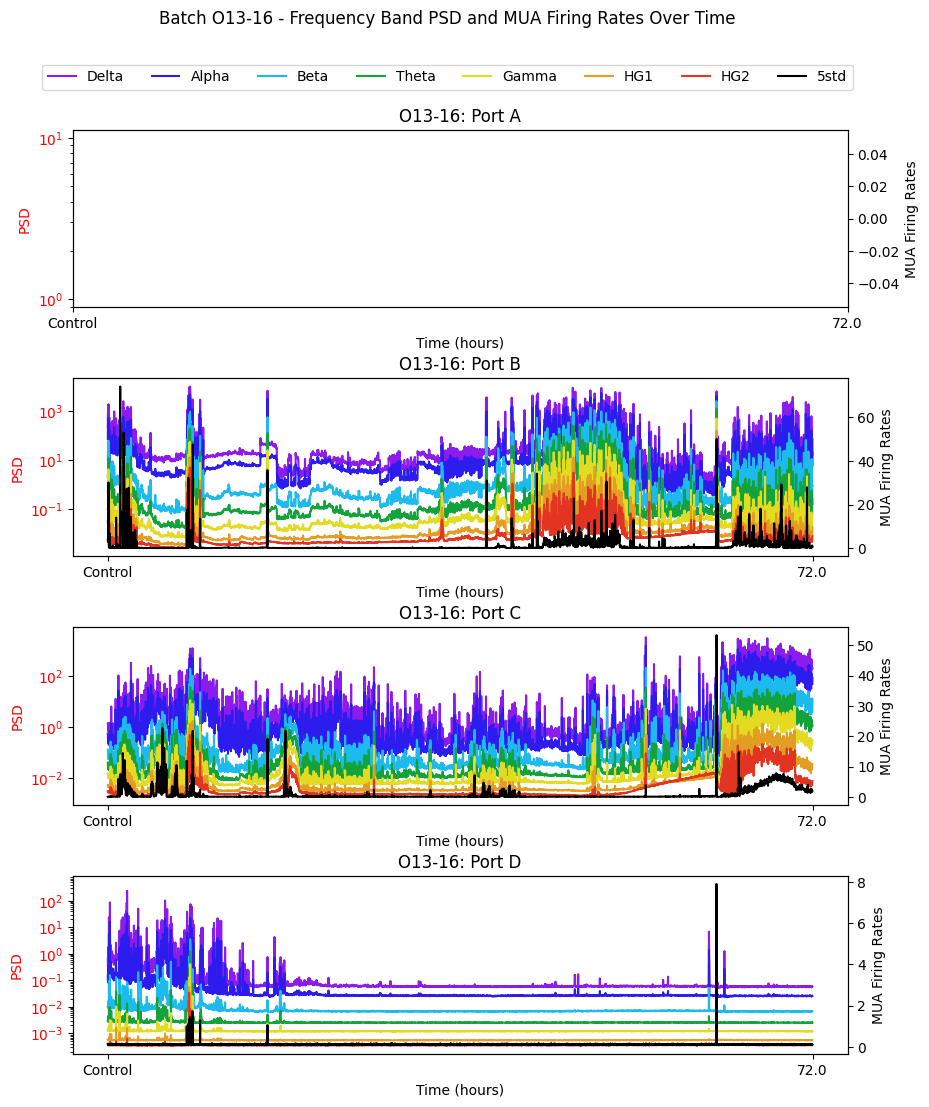

/var/folders/kj/qkc_fs3j2rx6nfm3mpsqdf940000gn/T/ipykernel_70579/3387682875.py:94: RuntimeWarning: Mean of empty slice
  hg1_data[batch] = np.nanmean(batch_data[:,:,6], axis=1)
/var/folders/kj/qkc_fs3j2rx6nfm3mpsqdf940000gn/T/ipykernel_70579/3387682875.py:29: RuntimeWarning: Mean of empty slice
  average_data = np.nanmean(drug_data, axis=1)


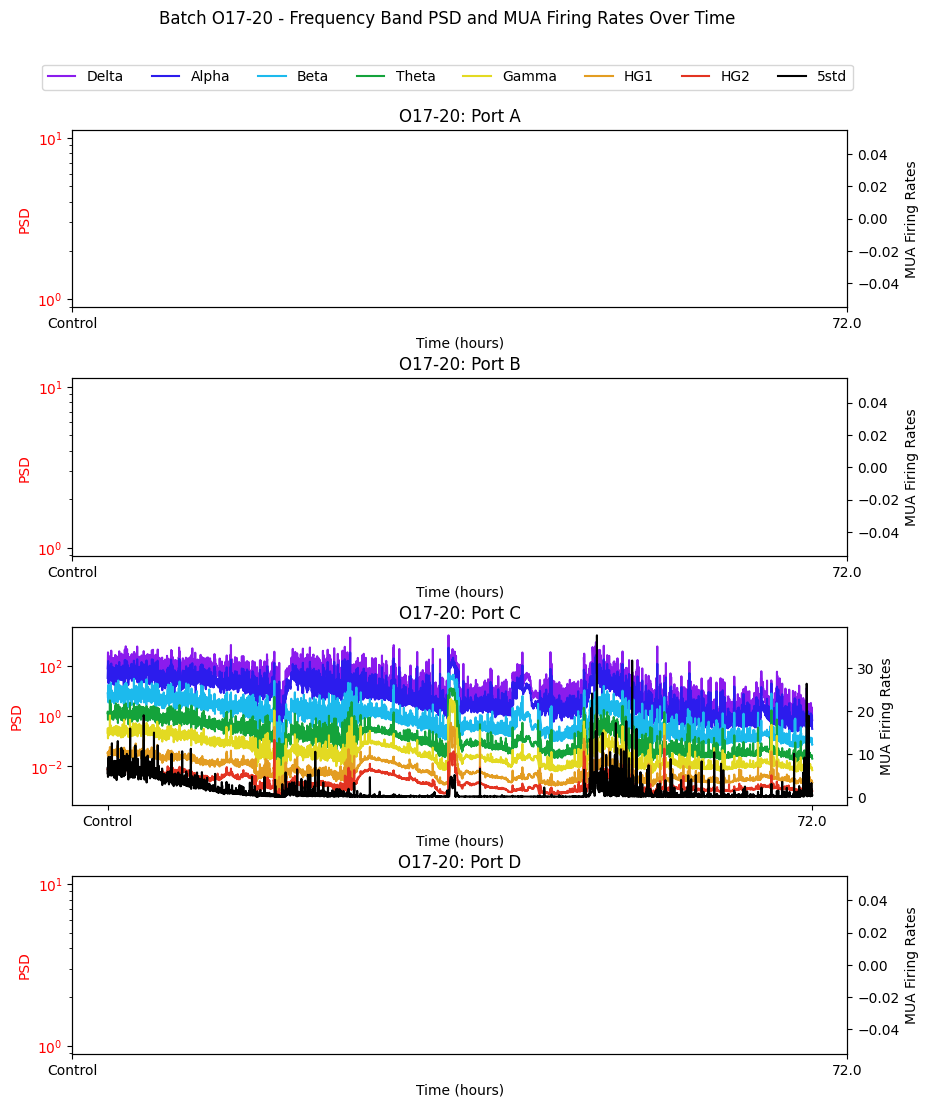

/var/folders/kj/qkc_fs3j2rx6nfm3mpsqdf940000gn/T/ipykernel_70579/3387682875.py:94: RuntimeWarning: Mean of empty slice
  hg1_data[batch] = np.nanmean(batch_data[:,:,6], axis=1)
/var/folders/kj/qkc_fs3j2rx6nfm3mpsqdf940000gn/T/ipykernel_70579/3387682875.py:29: RuntimeWarning: Mean of empty slice
  average_data = np.nanmean(drug_data, axis=1)


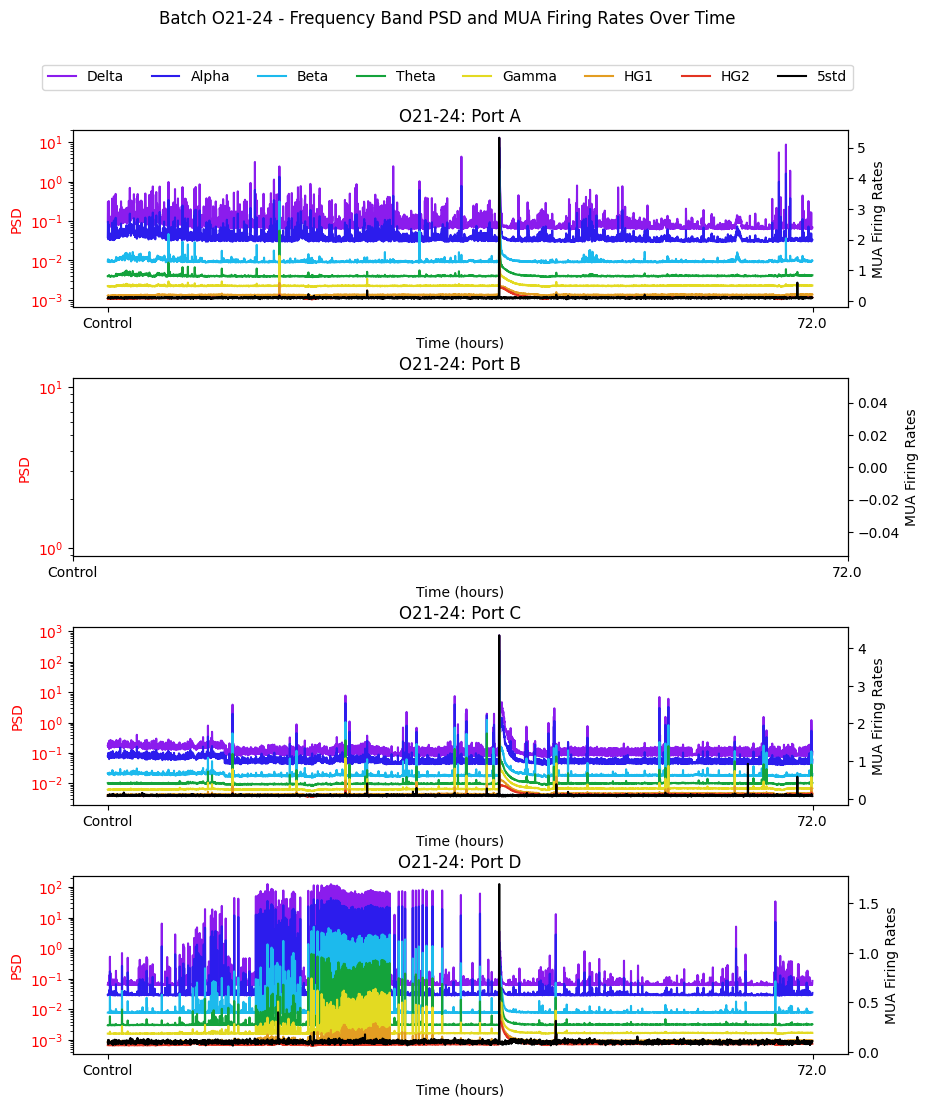

/var/folders/kj/qkc_fs3j2rx6nfm3mpsqdf940000gn/T/ipykernel_70579/3387682875.py:94: RuntimeWarning: Mean of empty slice
  hg1_data[batch] = np.nanmean(batch_data[:,:,6], axis=1)
/var/folders/kj/qkc_fs3j2rx6nfm3mpsqdf940000gn/T/ipykernel_70579/3387682875.py:29: RuntimeWarning: Mean of empty slice
  average_data = np.nanmean(drug_data, axis=1)


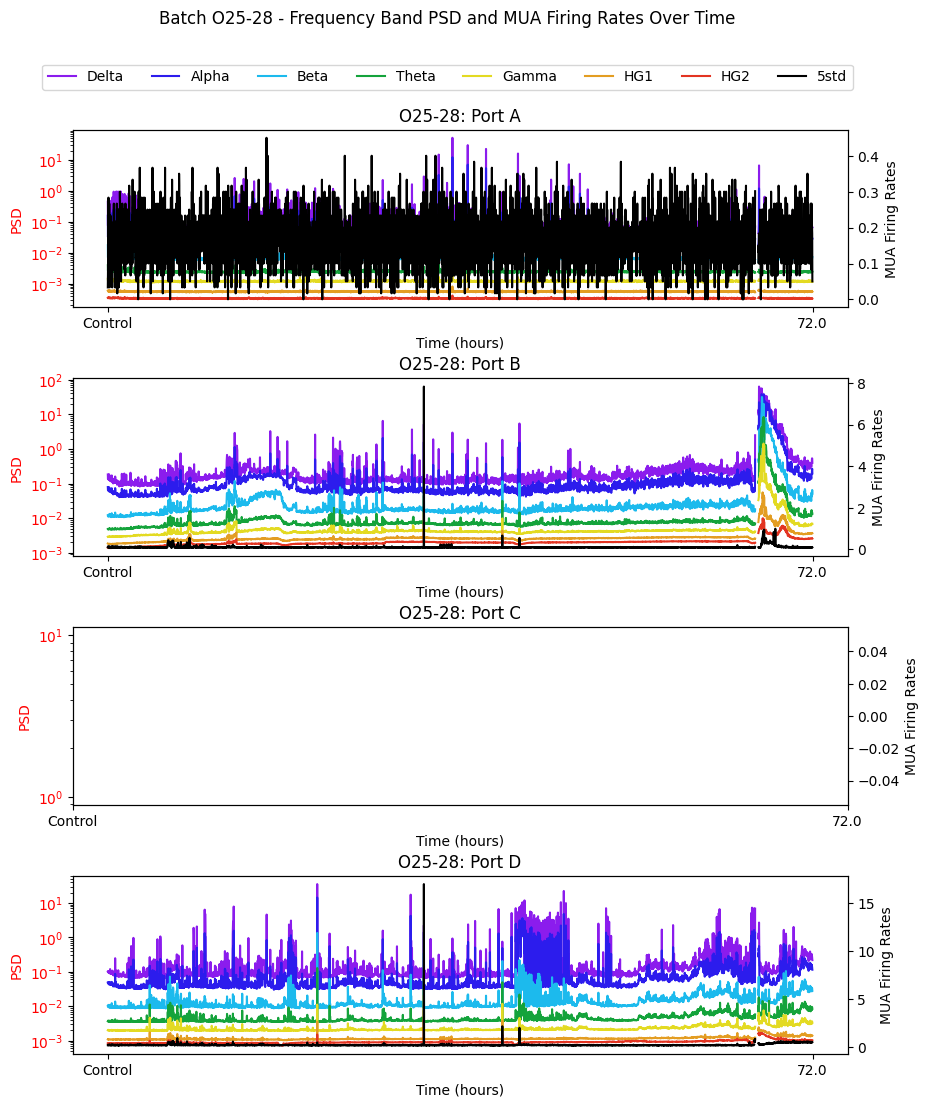

/var/folders/kj/qkc_fs3j2rx6nfm3mpsqdf940000gn/T/ipykernel_70579/3387682875.py:94: RuntimeWarning: Mean of empty slice
  hg1_data[batch] = np.nanmean(batch_data[:,:,6], axis=1)


In [21]:
# Create a B Ox1 Figures 
# Each subplot will contain ax1(time vs PSD), ax2(time vs firing rate) for each organoid
# time will span across all drug time windows
# x-label will have 0 and total (# mins) and the drug labels

hg1_data = {}

B = len(data) # num batches
feature_mask = np.array([True, True, True, True, True, True, True, False, False, True]) # take out 35uV and 4i thresholds

feature_names = np.array(["Delta", "Alpha", "Beta", "Theta", "Gamma", "HG1", "HG2", "35uV", "4std", "5std"])[feature_mask]
organoid_names = np.array(["Port A", "Port B", "Port C", "Port D"])
colors = np.array(["#8b1ced", "#2c1ced", "#1cbaed", "#14a33b", "#e3da22", "#e39d22", "#e33422", "#a2a2a2", "#5f5f5f", "#000000"])[feature_mask]

for batch, batch_dict in data.items():

    batch_data = []
    drug_idx = []
    for drug, (drug_data, mask) in batch_dict.items():

        # get filter for valid channels
        data_mask = get_total_mask(mask, rms=False)
        drug_mask = np.tile(data_mask[:,:,:,np.newaxis], (1,1,1,10))

        # apply mask
        drug_data = apply_mask(drug_data, drug_mask)

        # average acrosss channels
        average_data = np.nanmean(drug_data, axis=1)
      
        # remove unwanted features
        average_data = average_data[:, :, feature_mask]

        # add drug index
        drug_idx.append(average_data.shape[1])

        # append to batch data list
        batch_data.append(average_data)
    drug_idx = np.cumsum(drug_idx)
    batch_data = np.concatenate(batch_data, axis=1) # organoid x time(min) x feature

    [O,T,F] = np.shape(batch_data)
    t = np.arange(T) # time (min)

    # Create a figure for each batch
    fig, axs = plt.subplots(O, 1, figsize=(10, 3*O))
    
    # Plot data for each organoid
    lines1 = []
    labels1 = []
    lines2 = []
    labels2 = []
    
    for o, ax in enumerate(axs):
        # Plot frequency band PSD (f=0:7) on the left axis
        for f in range(7):
            line = ax.plot(t, batch_data[o, :, f], color=colors[f], label=feature_names[f])[0]
            if o==1:
                lines1.append(line)
                labels1.append(feature_names[f])
        ax.set_yscale('log')
        ax.set_xlabel('Time (hours)')
        ax.set_ylabel('PSD', color='r')
        ax.tick_params(axis='y', labelcolor='r')
        
        # Plot MUA firing rates (f=7:10) on the right axis
        ax2 = ax.twinx()
        for f in range(7, len(feature_names)):
            line = ax2.plot(t, batch_data[o, :, f], color=colors[f], label=feature_names[f])[0]
            if o==1:
                lines2.append(line)
                labels2.append(feature_names[f])
        
        ax2.set_ylabel('MUA Firing Rates', color='k')
        ax2.tick_params(axis='y', labelcolor='k')
        
        # Set xticks
        drug_names = list(batch_dict.keys()) + [np.round(T/60, decimals=1)]
        xticks = [0]+ drug_idx[:-1].tolist() + [T]  # Exclude the last drug index
        ax.set_xticks(xticks)
        ax.set_xticklabels(drug_names)
        
        ax.set_title(f'{batch}: {organoid_names[o]}')
    
    # Combine legends across all subplots and place at the top
    fig.legend(lines1 + lines2, labels1 + labels2, loc='upper center', ncol=len(feature_names), bbox_to_anchor=(.5, .94))

    
    plt.subplots_adjust(hspace=.4)
    
    fig.suptitle(f'Batch {batch} - Frequency Band PSD and MUA Firing Rates Over Time')
    plt.show()

    hg1_data[batch] = np.nanmean(batch_data[:,:,6], axis=1)


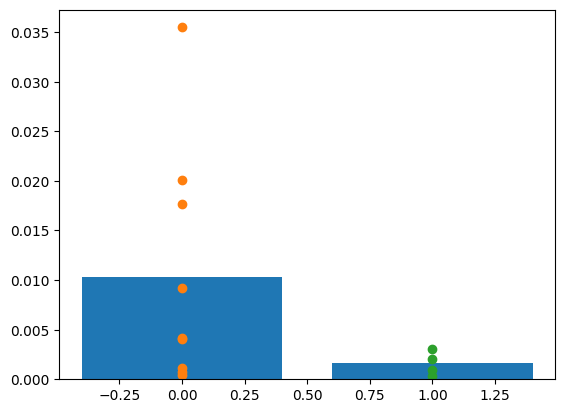

In [22]:
organoid_batches = ["O9-12", "O13-16", "O21-24"]

bar_data = {}
bar_data["organoids"] = []
bar_data["chimeras"] = []

for batch_id, hg1_values in hg1_data.items():
    if batch_id in organoid_batches:
        bar_data["organoids"].extend(hg1_values[~np.isnan(hg1_values)])
    else:
        bar_data["chimeras"].extend(hg1_values[~np.isnan(hg1_values)])

plt.figure()
plt.bar([0,1], [np.mean(bar_data["organoids"]), np.mean(bar_data["chimeras"])])
plt.scatter([0]*len(bar_data["organoids"]), bar_data["organoids"])
plt.scatter([1]*len(bar_data["chimeras"]), bar_data["chimeras"])

# Correlation Coefficient

In [6]:
# Make Session Dict
batch_ids = ["O9-12", "O13-16", "O17-20", "O21-24", "O25-28"]
drug_names = ["Control"]

session = make_session_dict(
    batch_ids=batch_ids, 
    drug_names=drug_names,
    start_delay=datetime.timedelta(hours=8),
    length=datetime.timedelta(days=7)
    )

In [95]:
# Make Session Dict
batch_ids = ["O9-12", "O13-16", "O17-20", "O21-24", "O25-28"]
drug_names = ["4-AP"]

session = make_session_dict(
    batch_ids=batch_ids, 
    drug_names=drug_names,
    start_delay=datetime.timedelta(minutes=5),
    length=datetime.timedelta(hours=3)
    )

In [8]:
processed_data_dir = os.path.join(os.getcwd(), "processed_data")
data = get_data_dict(session, processed_data_dir)

O9-12:
Control:
Processing 230504.npz
1347/1347 minutes sucessfully recorded
88.42% of data in valid rms range
82/128 electrodes inside organoids
57/128 electrodes in valid impedance range
22.94% of data pass all filters

Processing 230505.npz
1440/1440 minutes sucessfully recorded
80.26% of data in valid rms range
82/128 electrodes inside organoids
57/128 electrodes in valid impedance range
20.05% of data pass all filters

Processing 230506.npz
1440/1440 minutes sucessfully recorded
77.04% of data in valid rms range
82/128 electrodes inside organoids
57/128 electrodes in valid impedance range
19.04% of data pass all filters

Processing 230507.npz
1440/1440 minutes sucessfully recorded
75.77% of data in valid rms range
82/128 electrodes inside organoids
57/128 electrodes in valid impedance range
18.75% of data pass all filters

Processing 230508.npz
1440/1440 minutes sucessfully recorded
75.63% of data in valid rms range
82/128 electrodes inside organoids
57/128 electrodes in valid imp

/var/folders/kj/qkc_fs3j2rx6nfm3mpsqdf940000gn/T/ipykernel_44305/1724973464.py:78: RuntimeWarning: invalid value encountered in scalar divide
  print(f"{np.round((np.sum(file_mask[:,:,:,1])/np.size(file_mask[:,:,minute_mask,1]))*100, decimals=2)}% of data in valid rms range")


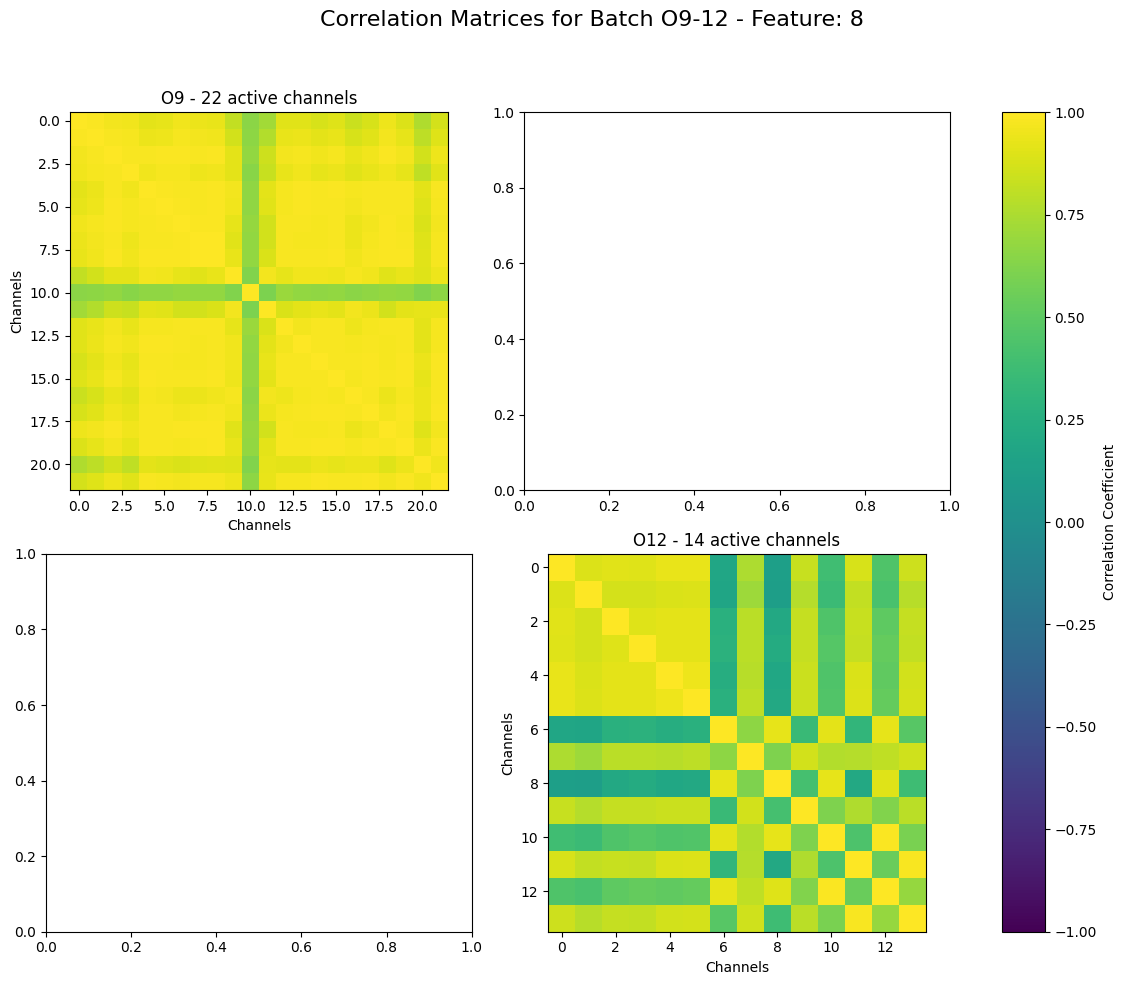

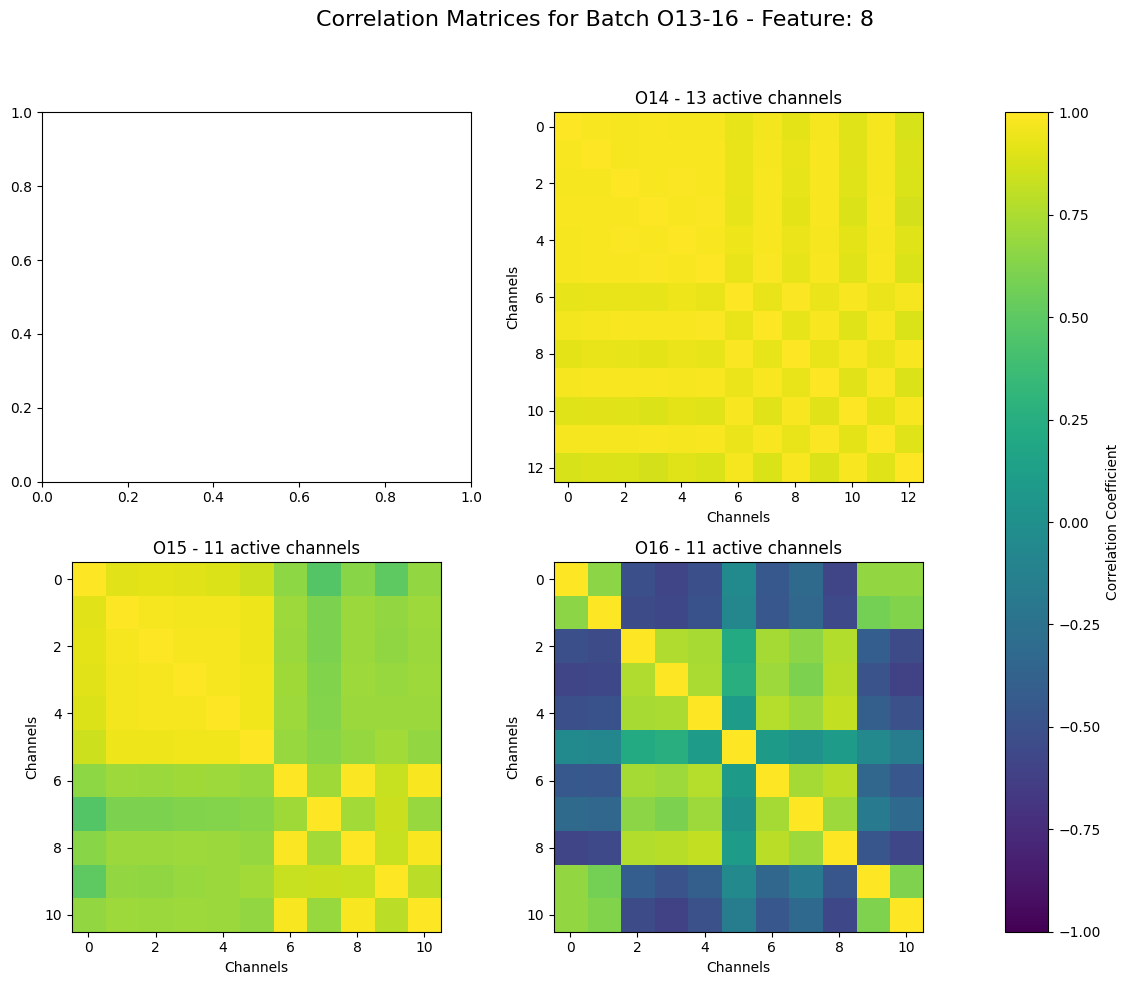

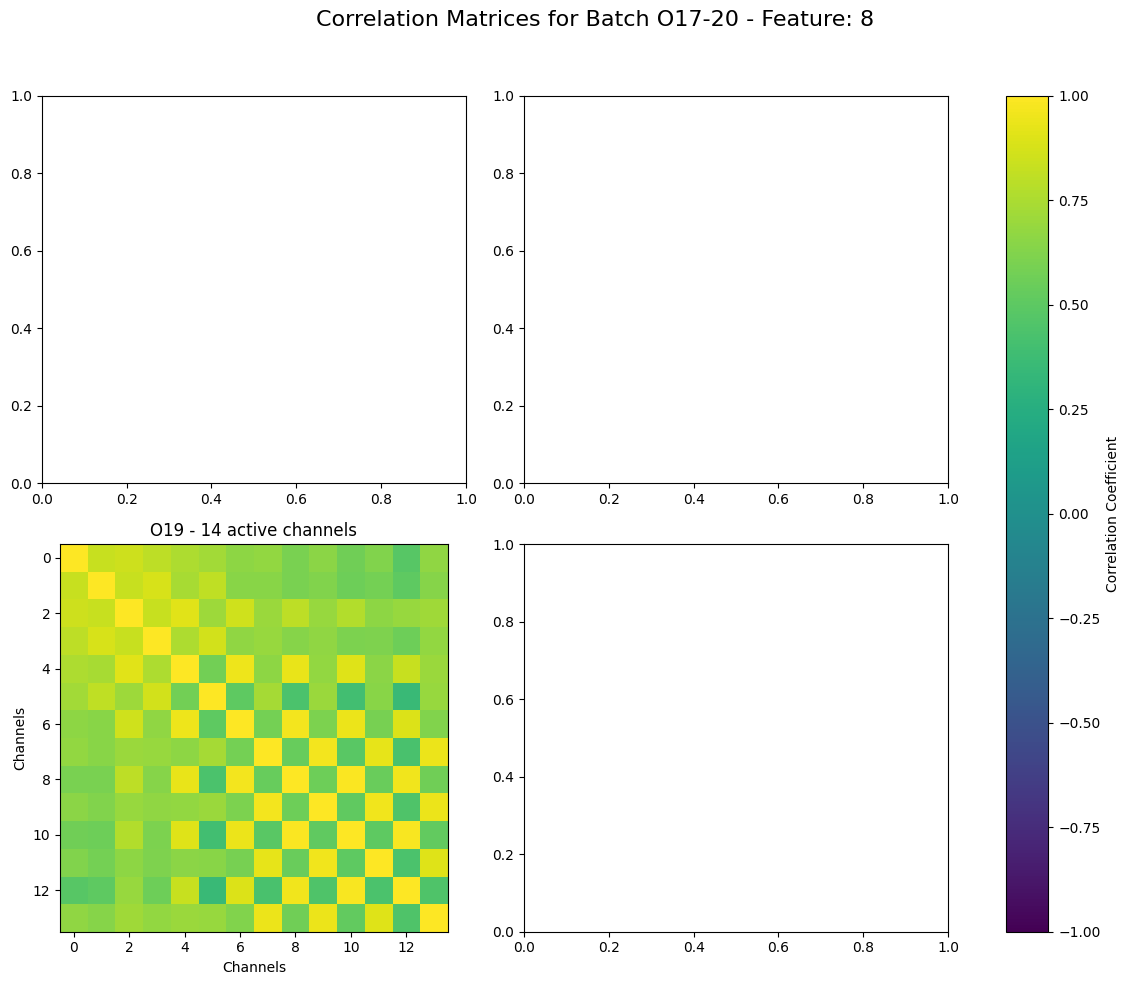

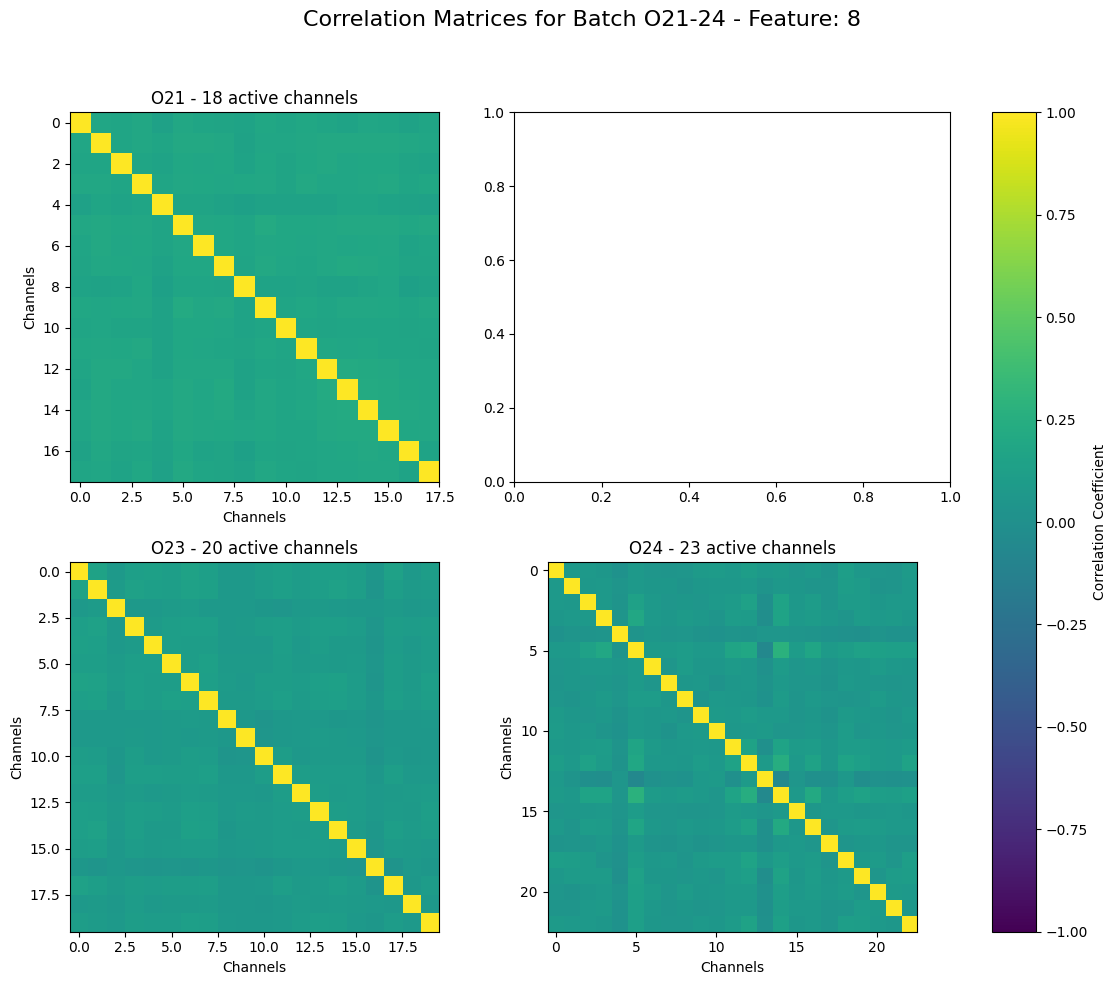

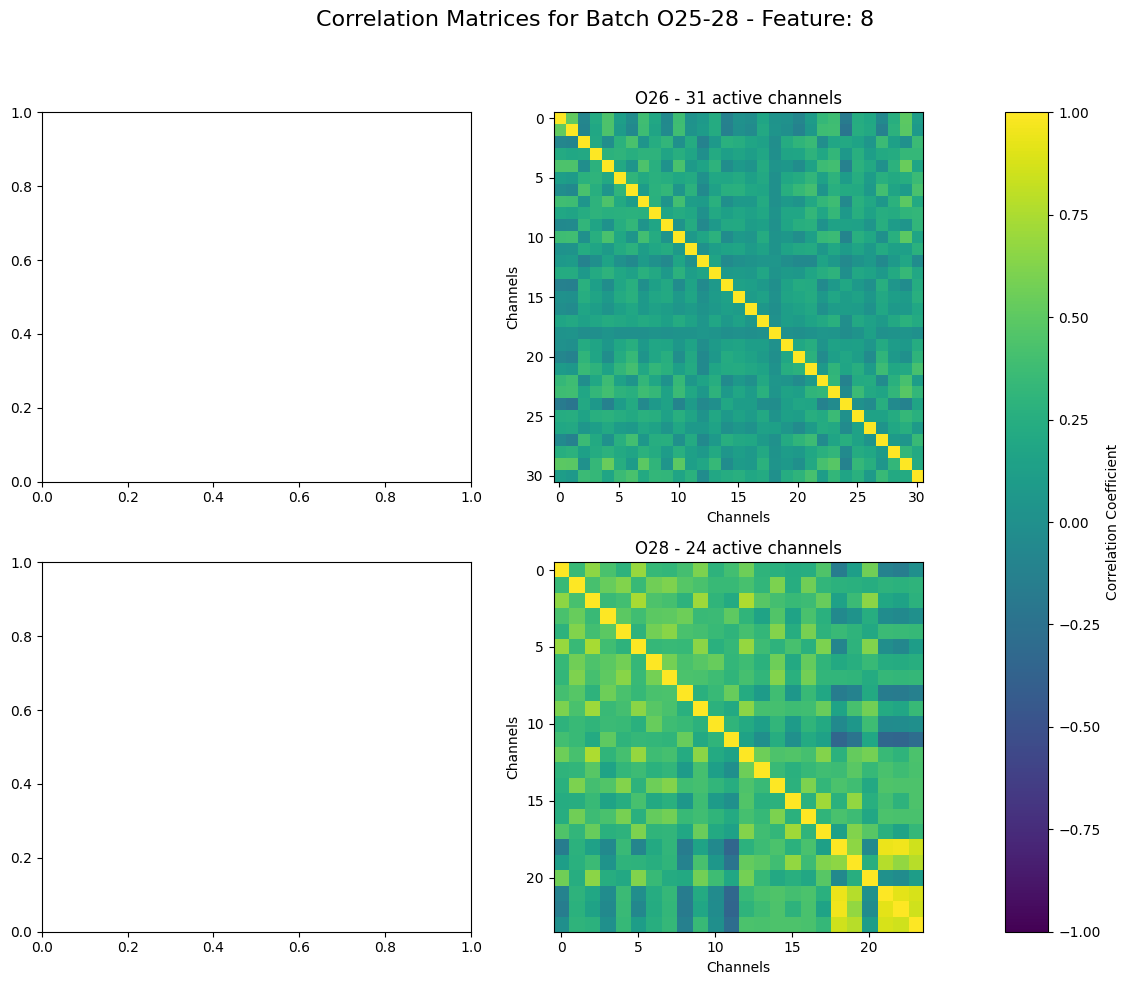

In [9]:
# Get Correlation coefficient matrix
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

feature_idx = 8 # [Delta, Theta, Alpha, Beta, Gamma, HG1, HG2, 35 uV, 4i uV, 5i uV]
corcoef_dict = {}

for batch, batch_dict in data.items():
    corcoef_dict[batch] = {}
    
    batch_data, batch_mask = batch_dict["Control"]
    # batch_data, batch_mask = batch_dict["Tetrodotoxin"]

    batch_data = batch_data[:,:,:,feature_idx]
    batch_mask = get_total_mask(batch_mask, rms=False)

    [O, C, T] = batch_data.shape # [num org, num channels, num min]
    org_ids = get_organoid_ids(batch)
    for o in range(O):
        org_data = apply_mask(batch_data[o,:,:], batch_mask[o,:,:])

        # find active channels (outside or impedance) (remove channels with no active time points)
        active_channels = ~(np.sum(~np.isnan(org_data), axis=1) == 0)
        org_data = org_data[active_channels, :]

        active_times = (np.sum(np.isnan(org_data), axis=0) == 0)
        org_data = org_data[:, active_times]

        # normalize data
        if org_data.shape[0] != 0:
            org_data = (org_data - np.mean(org_data, axis=1)[:, np.newaxis]) / np.std(org_data, axis=1)[:, np.newaxis]

        corcoef_dict[batch][org_ids[o]] = np.corrcoef(org_data)

# Create figures after all correlation matrices have been calculated
for batch, batch_dict in corcoef_dict.items():
    # Create a 2x2 figure for each batch with correlation matrices
    fig = plt.figure(figsize=(12, 10))
    gs = GridSpec(2, 3, width_ratios=[1, 1, 0.1])  # 2x2 grid with extra column for colorbar

    # Get the number of organoids in this batch
    num_orgs = len(batch_dict)
    
    # Find global min and max for consistent colorbar
    vmin = -1
    vmax = 1
    
    # Create subplots for each organoid (up to 4 in a 2x2 grid)
    for i, (org_key, corr_matrix) in enumerate(batch_dict.items()):
        if i >= 4:  # Only show up to 4 organoids in the 2x2 grid
            break
            
        row = i // 2
        col = i % 2
        
        ax = fig.add_subplot(gs[row, col])
        if np.size(corr_matrix) > 5:
            im = ax.imshow(corr_matrix, cmap='viridis', vmin=vmin, vmax=vmax)
            ax.set_title(f'{org_key} - {corr_matrix.shape[0]} active channels')
            ax.set_xlabel('Channels')
            ax.set_ylabel('Channels')
        
    # Add a single colorbar for the entire figure
    cbar_ax = fig.add_subplot(gs[:, 2])
    cbar = fig.colorbar(im, cax=cbar_ax)
    cbar.set_label('Correlation Coefficient')
    
    plt.suptitle(f'Correlation Matrices for Batch {batch} - Feature: {feature_idx}', fontsize=16)
    plt.tight_layout(rect=[0, 0, 0.95, 0.95])  # Adjust layout to make room for the suptitle
    
    # Save or display the figure
    plt.show()



skipping O13: num_active_channels=0.0
skipping O25: num_active_channels=1.0
skipping O27: num_active_channels=0.0


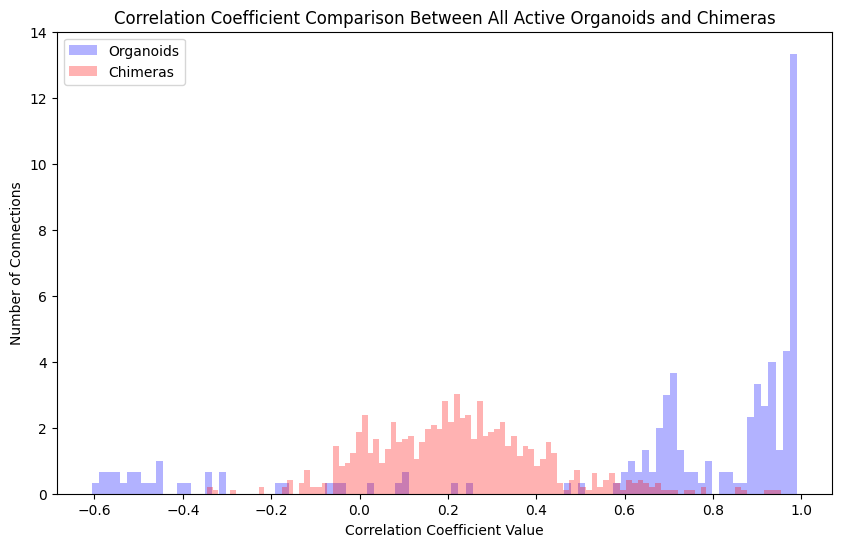

In [ ]:
# correlation coefficient histograms

organoids = ["O9-12", "O13-16", "O21-24"]
org_values = []
chimera_values = []

for batch, batch_dict in corcoef_dict.items():
    
    is_organoid = batch in organoids

    for org, corr in batch_dict.items():

        if corr.size < 5^2: # at least 5 active channels
            print(f"skipping {org}: num_active_channels={np.sqrt(corr.size)}")
            continue

        corr_values = corr[np.triu_indices(corr.shape[0], k=1)]

        if is_organoid:
            org_values.extend(list(corr_values))
        else:
            chimera_values.extend(list(corr_values))

plt.figure(figsize=(10, 6))
plt.hist(org_values, bins=100, alpha=.3, label="Organoids", color='b', density=True)
plt.hist(chimera_values, bins=100, alpha=.3, label="Chimeras", color='r', density=True)

plt.legend()
plt.title('Correlation Coefficient Comparison Between All Active Organoids and Chimeras')
plt.xlabel('Correlation Coefficient Value')
plt.ylabel('Number of Connections')
plt.show()

In [12]:
def get_asterisks(p_value):

    if p_value <= .0001:
        return "****"
    
    elif p_value <= .001:
        return "***"
    
    elif p_value <= .01:
        return "**"
    
    elif p_value <= .05:
        return "*"
    
    else:
        return ""

/var/folders/kj/qkc_fs3j2rx6nfm3mpsqdf940000gn/T/ipykernel_44305/3468100888.py:51: UserWarning: Adding colorbar to a different Figure <Figure size 1200x1000 with 5 Axes> than <Figure size 800x900 with 3 Axes> which fig.colorbar is called on.
  cbar = fig.colorbar(im, cax=cbar_ax)


Text(0.6, 0.95, 'Correlation Coefficient Map')

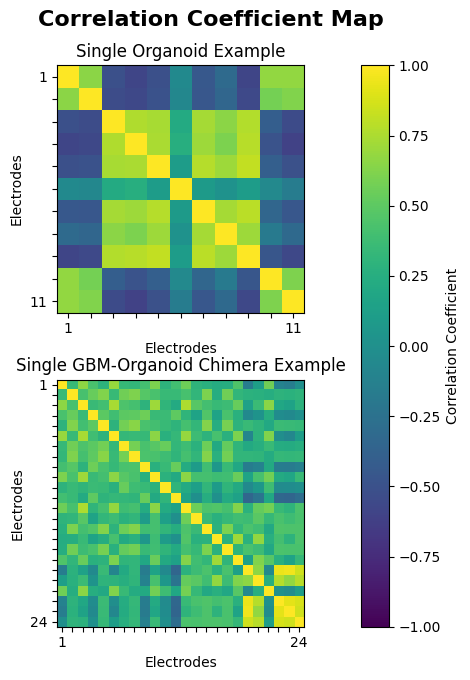

In [10]:
# Create a correlation matrix plot example for organoids and chimeras (2x1)

# organoid example
org_batch = "O13-16"
org_idx = "O16"

# chimera example 
chim_batch = "O25-28"
chim_idx = "O28"

# generate figure
fig = plt.figure(figsize=(8, 9))
gs = GridSpec(2, 2, width_ratios=[1, 0.05])  # 2x2 grid with extra column for colorbar

# colorbar min/max
vmin = -1
vmax = 1

# plot organoid map
org_matrix = corcoef_dict[org_batch][org_idx]
num_channels_o = org_matrix.shape[0]

ax_o = fig.add_subplot(gs[0,0])
im_o = ax_o.imshow(org_matrix, cmap='viridis', vmin=vmin, vmax=vmax)

ax_o.set_title("Single Organoid Example")
ax_o.set_xlabel("Electrodes")
ax_o.set_ylabel("Electrodes")
ax_o.set_xticks(list(range(num_channels_o)))
ax_o.set_yticks(list(range(num_channels_o)))
ax_o.set_xticklabels([1] + [""]*(num_channels_o-2) + [num_channels_o])
ax_o.set_yticklabels([1] + [""]*(num_channels_o-2) + [num_channels_o])

# plot chimera map
chim_matrix = corcoef_dict[chim_batch][chim_idx]
num_channels_c = chim_matrix.shape[0]

ax_c = fig.add_subplot(gs[1,0])
im_c = ax_c.imshow(chim_matrix, cmap='viridis', vmin=vmin, vmax=vmax)

ax_c.set_title("Single GBM-Organoid Chimera Example")
ax_c.set_xlabel("Electrodes")
ax_c.set_ylabel("Electrodes")
ax_c.set_xticks(list(range(num_channels_c)))
ax_c.set_yticks(list(range(num_channels_c)))
ax_c.set_xticklabels([1] + [""]*(num_channels_c-2) + [num_channels_c])
ax_c.set_yticklabels([1] + [""]*(num_channels_c-2) + [num_channels_c])

# add colorbar
cbar_ax = fig.add_subplot(gs[:, 1])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label('Correlation Coefficient', loc='center')

# figure layout stuff
fig.tight_layout(rect=[.2, .2, 0.93, 0.93], h_pad=.1)
fig.suptitle("Correlation Coefficient Map",             
             x=0.6,            # centered horizontally
             y=0.95,           # slightly lower than default
             fontsize=16,      # larger text
             fontweight='bold',# bold text
             
)         



skipping O13: num_active_channels=0.0
skipping O25: num_active_channels=1.0
skipping O27: num_active_channels=0.0


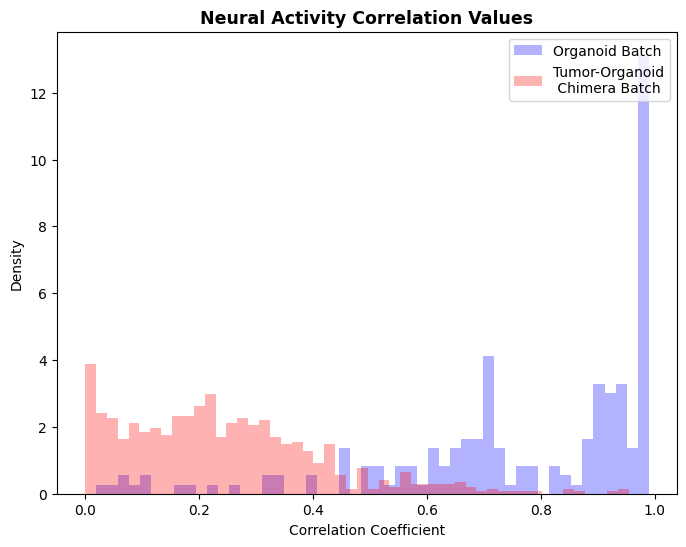

In [17]:
# Batch Histogram Corr coeff organoids vs chimeras

# plot batches
org_batch = "O13-16"
chim_batch = "O25-28"

# get data
org_data = []
for org_id, corr_matrix in corcoef_dict[org_batch].items():
        
    if corr_matrix.size < 5^2: # at least 5 active channels
        print(f"skipping {org_id}: num_active_channels={np.sqrt(corr_matrix.size)}")
        continue

    corr_values = corr_matrix[np.triu_indices(corr_matrix.shape[0], k=1)]
    org_data.extend(corr_values)

chim_data = []
for chim_id, corr_matrix in corcoef_dict[chim_batch].items():

    if corr_matrix.size < 5^2: # at least 5 active channels
        print(f"skipping {chim_id}: num_active_channels={np.sqrt(corr_matrix.size)}")
        continue

    corr_values = corr_matrix[np.triu_indices(corr_matrix.shape[0], k=1)]
    chim_data.extend(corr_values)

# Run Statistical Tests
# Run KS test on the two distributions
ks_stat, ks_p_value = scipy.stats.ks_2samp(org_data, chim_data)
u_stat, u_p_value = scipy.stats.mannwhitneyu(org_data, chim_data)


# plot data
plt.figure(figsize=(8,6))
plt.hist(np.abs(org_data), bins=50, alpha=.3, label="Organoid Batch", color='b', density=True)
plt.hist(np.abs(chim_data), bins=50, alpha=.3, label="Tumor-Organoid\n Chimera Batch", color='r', density=True)
plt.title('Neural Activity Correlation Values', fontsize=12.5, fontweight='bold')# bold text)
plt.xlabel("Correlation Coefficient")
plt.ylabel("Density")
plt.legend(loc='upper right')

# plt.text(.75,11, f"{get_asterisks(ks_p_value)}KS Test p-value: {np.round(ks_p_value, decimals=3)} \n {get_asterisks(u_p_value)}U Test p-value: {np.round(u_p_value, decimals=3)}")


In [ ]:
corcoef_dict[chim_batch].items()

In [14]:
corcoef_dict

{'O13-16': {'O13': array([], shape=(0, 0), dtype=float64),
  'O14': array([[1.        , 0.99948451, 0.99917203, 0.99924178, 0.99935555,
          0.99910437, 0.99888855, 0.99924397, 0.99922905, 0.9979695 ,
          0.99951574, 0.99954093, 0.99771253],
         [0.99948451, 1.        , 0.9999516 , 0.99992481, 0.9998204 ,
          0.99980232, 0.99977957, 0.99989351, 0.99995412, 0.99887071,
          0.99986734, 0.99880525, 0.99912364],
         [0.99917203, 0.9999516 , 1.        , 0.99994771, 0.99980607,
          0.99984164, 0.99986396, 0.99992774, 0.99995987, 0.99900718,
          0.99978739, 0.99849289, 0.99932993],
         [0.99924178, 0.99992481, 0.99994771, 1.        , 0.99993597,
          0.999953  , 0.99994662, 0.99998635, 0.99995697, 0.99932156,
          0.99990096, 0.99878741, 0.999484  ],
         [0.99935555, 0.9998204 , 0.99980607, 0.99993597, 1.        ,
          0.99996922, 0.99989893, 0.99993938, 0.9998383 , 0.99950682,
          0.99993727, 0.99915952, 0.99943007],

In [178]:
# Statistical Analysis
from scipy import stats

# Run KS test on the two distributions
ks_stat, p_value = stats.ks_2samp(org_data, chim_data)

print(f"KS statistic: {ks_stat}")
print(f"p-value: {p_value}")
print(f"Distributions are {'significantly different' if p_value < 0.05 else 'not significantly different'}")

KS statistic: 0.7612771700117725
p-value: 1.3461802564517385e-87
Distributions are significantly different


In [179]:
u_stat, p_value = stats.mannwhitneyu(org_data, chim_data)

print(f"Mann-Whitney U statistic: {u_stat}")
print(f"p-value: {p_value}")
print(f"Distributions are {'significantly different' if p_value < 0.05 else 'not significantly different'}")

Mann-Whitney U statistic: 114748.0
p-value: 7.310806223774138e-43
Distributions are significantly different


In [90]:
# Make Session Dict andd Get Data
batch_ids = ["O9-12", "O13-16", "O17-20", "O21-24", "O25-28"]
drug_names = ["Control", "4-AP", "No Drug", "Bicuculline", "Tetrodotoxin"]

session = make_session_dict(
    batch_ids=batch_ids, 
    drug_names=drug_names,
    start_delay=datetime.timedelta(minutes=5),
    length=datetime.timedelta(hours=3)
    )

# rename Control to Control 1 (at start of experiment)
for batch_id, batch_dict in session.items():
    batch_dict["Control 1"] = batch_dict.pop("Control")

    # create Control 2 right before 4-AP introduciton
    cntrl2_st = batch_dict["4-AP"][0] - datetime.timedelta(hours=4)
    cntrl2_et = cntrl2_st + datetime.timedelta(hours=3)
    batch_dict["Control 2"] = (cntrl2_st, cntrl2_et)

    # reorder dictionary
    order = ["Control 1", "Control 2", "4-AP", "No Drug", "Bicuculline", "Tetrodotoxin"]
    session[batch_id] = {k: batch_dict[k] for k in order}

In [91]:
processed_data_dir = os.path.join(os.getcwd(), "processed_data")
data = get_data_dict(session, processed_data_dir)

O9-12:
Control 1:
Processing 230503.npz
181/181 minutes sucessfully recorded
86.56% of data in valid rms range
82/128 electrodes inside organoids
57/128 electrodes in valid impedance range
24.18% of data pass all filters

Control 2:
Processing 230518.npz
181/181 minutes sucessfully recorded
67.28% of data in valid rms range
82/128 electrodes inside organoids
57/128 electrodes in valid impedance range
18.75% of data pass all filters

4-AP:
Processing 230518.npz
181/181 minutes sucessfully recorded
65.56% of data in valid rms range
82/128 electrodes inside organoids
57/128 electrodes in valid impedance range
18.73% of data pass all filters

No Drug:
Processing 230518.npz
181/181 minutes sucessfully recorded
66.09% of data in valid rms range
82/128 electrodes inside organoids
57/128 electrodes in valid impedance range
18.75% of data pass all filters

Bicuculline:
Processing 230519.npz
181/181 minutes sucessfully recorded
65.69% of data in valid rms range
82/128 electrodes inside organoids

In [145]:
# Get correlation vlaues (average of top diagnol of crorelation matrix)

feature_idx = 8 # [Delta, Alpha, Beta, Theta, Gamma, HG1, HG2, 35 uV, 4i uV, 5i uV]
corr_dict = {}

tbin = 10 # min

for batch, batch_dict in data.items():
    
    drug_list = []
    t = None
    drug_idx = []
    for drug, drug_dict in batch_dict.items():
        
        # extract data
        drug_data, drug_mask = drug_dict

        drug_data = drug_data[:,:,:,feature_idx]
        drug_mask = get_total_mask(drug_mask, rms=False)

        # remove times with no recording
        active_times = ~(np.sum(drug_mask, axis=(0,1)) == 0)
        drug_data = drug_data[:,:,active_times]
        drug_mask = drug_mask[:,:,active_times]

        [O, C, T] = drug_data.shape
        org_ids = get_organoid_ids(batch)
        I = T // tbin

        corr_array = np.full((O,I), np.nan)
        if t is None:
            t = list(range(I))
        else:
            t_end = t[-1]+1
            t.extend(range(t_end, t_end+I))
        drug_idx.append(t[-1])

        for o in range(O):
            org_data = apply_mask(drug_data[o,:,:], drug_mask[o,:,:])

            # find active channels (outside or impedance) (remove channels with no active time points)
            active_channels = ~(np.sum(~np.isnan(org_data), axis=1) == 0)
            org_data = org_data[active_channels, :]

            # minimum of 5 actvie channels to include
            if org_data.shape[0] < 5:
                continue

            for i in range(I):
                bin_idx = np.arange(tbin*(i),tbin*(i+1))
                bin_data = org_data[:,bin_idx]

                # get correlation matrix
                correlation_matrix = np.corrcoef(bin_data)

                # get correlation values
                corr_values = correlation_matrix[np.triu_indices(correlation_matrix.shape[0], k=1)]

                # store mean of correlation values
                corr_array[o, i] = np.mean(np.abs(corr_values))
        drug_list.append(corr_array)
        batch_array = np.concatenate(drug_list, axis=1)

        corr_dict[batch] = (t, batch_array, drug_idx)

        

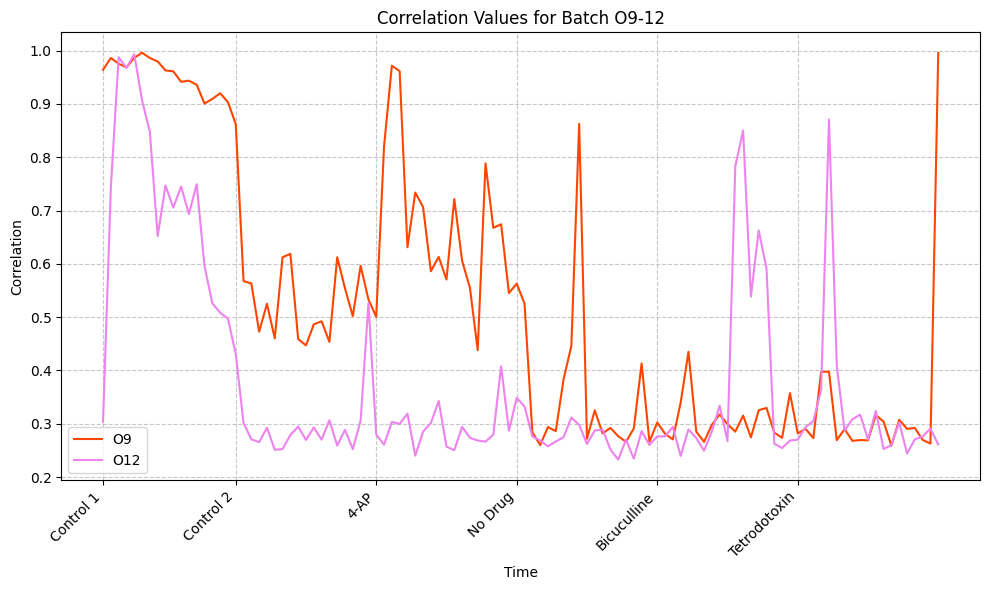

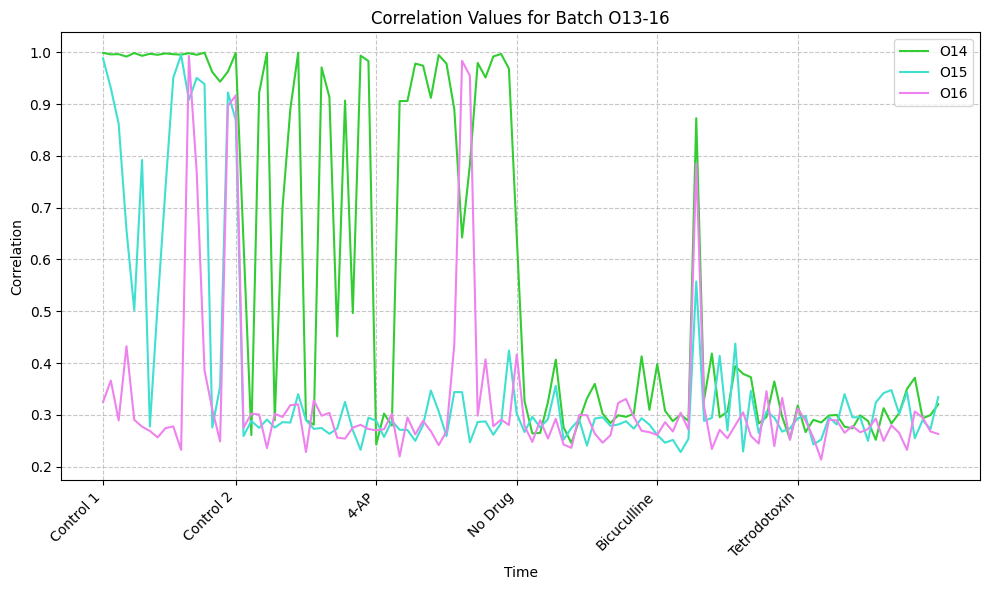

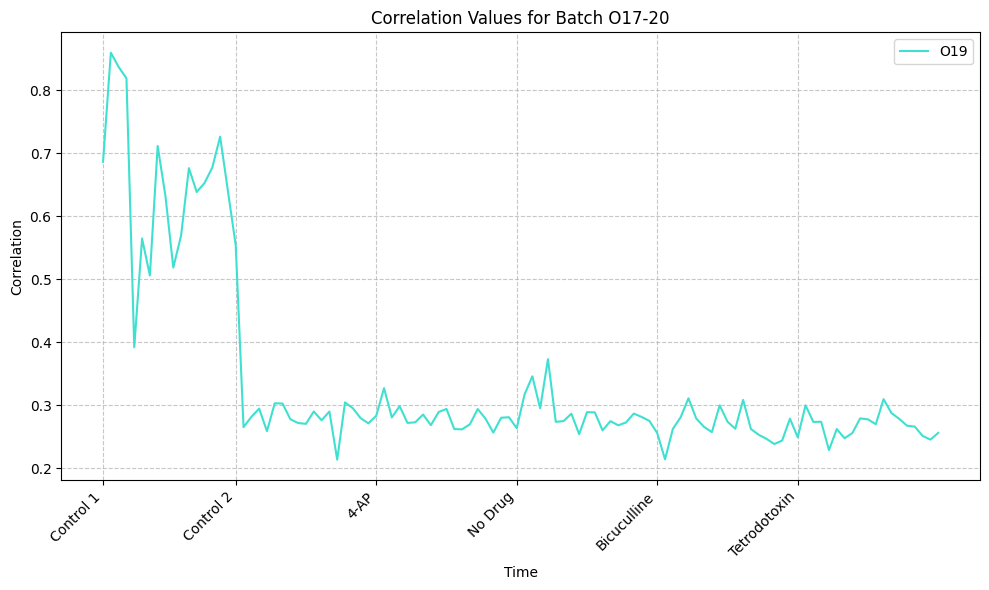

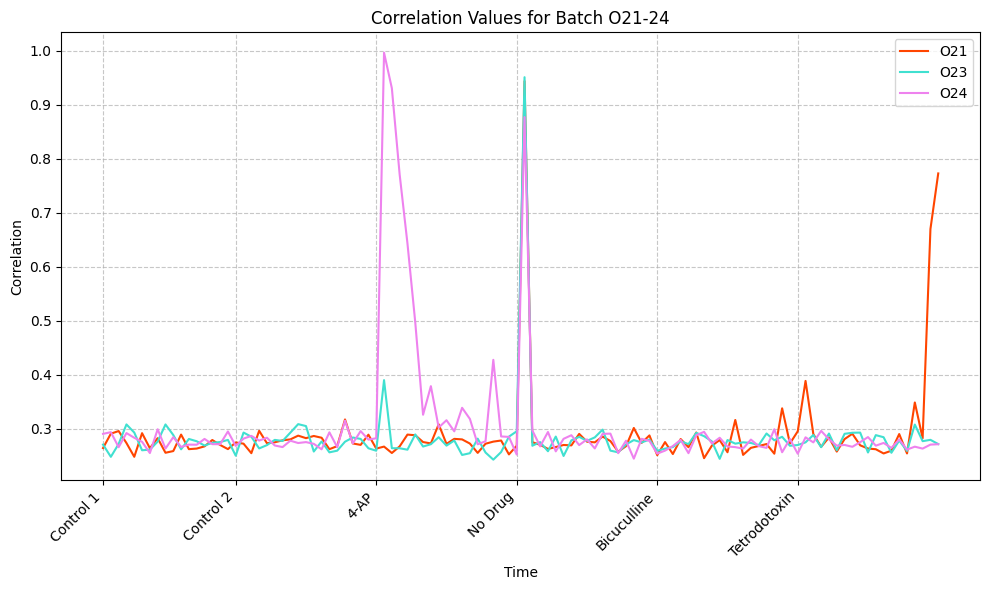

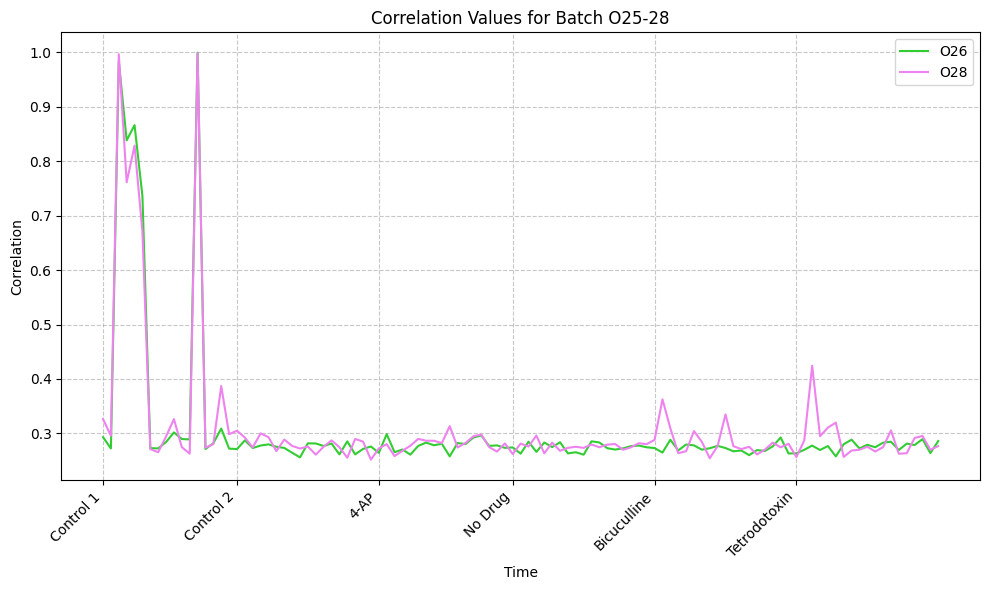

In [146]:
# Plot Correlation Values (time vs correlation) (figure per batch, line per organoid)
colors = ['orangered', 'limegreen', 'turquoise', 'violet']
d_labels = ["Control 1", "Control 2", "4-AP", "No Drug", "Bicuculline", "Tetrodotoxin"]

for batch, (t, plot_data, d_idx) in corr_dict.items():
    d_idx = [0] + d_idx[:-1]  # add 0 remove last value
    
    org_ids = get_organoid_ids(batch)

    plt.figure(figsize=(10, 6))  # Create a new figure for each batch
    
    for o, org_id in enumerate(org_ids):
        org_data = plot_data[o, :]

        # skip nan values (invalid organoids)
        if np.isnan(np.sum(org_data)):
            continue

        plt.plot(t, org_data, color=colors[o], label=org_id)

    plt.xlabel('Time')
    plt.ylabel('Correlation')
    plt.title(f'Correlation Values for Batch {batch}')
    plt.legend()

    # Set x-axis ticks and labels
    plt.xticks(d_idx, d_labels, rotation=45, ha='right')

    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()



In [83]:
d_idx

[0, 8, 17, 26, 35]

In [84]:
d_labels

['Control 1', 'Control 2', '4-AP', 'No Drug', 'Bicuculline', 'Tetrodotoxin']

In [40]:
i=2
np.arange(tbin*(i),tbin*(i+1))

array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
       57, 58, 59])

In [ ]:
[O, C, T] = batch_data.shape # [num org, num channels, num min]
org_ids = get_organoid_ids(batch)
for o in range(O):
    org_data = apply_mask(batch_data[o,:,:], batch_mask[o,:,:])

    # find active channels (outside or impedance) (remove channels with no active time points)
    active_channels = ~(np.sum(~np.isnan(org_data), axis=1) == 0)
    org_data = org_data[active_channels, :]

    active_times = (np.sum(np.isnan(org_data), axis=0) == 0)
    org_data = org_data[:, active_times]
    print(org_data.shape[1])
    # minimum of 5 actvie channels to include
    if org_data.shape[0] < 5:
        print(f"skipping {org_ids[o]}, only {org_data.shape[0]} active channels")
        continue
    
    # get correlation matrix
    correlation_matrix = np.corrcoef(org_data)

    # get correlation values
    corr_values = correlation_matrix[np.triu_indices(correlation_matrix.shape[0], k=1)]

181
skipping O25, only 1 active channels
181
181
skipping O27, only 0 active channels
181


In [ ]:
feature_idx = 5 # [Delta, Theta, Alpha, Beta, Gamma, HG1, HG2, 35 uV, 4i uV, 5i uV]
data_dict = {}

for batch, batch_dict in data.items():
    data_dict[batch] = {}
    
    batch_data, batch_mask = batch_dict["Control"]
    # batch_data, batch_mask = batch_dict["4-AP"]

    batch_data = batch_data[:,:,:,feature_idx]
    batch_mask = get_total_mask(batch_mask, rms=False)

    [O, C, T] = batch_data.shape # [num org, num channels, num min]
    org_ids = get_organoid_ids(batch)
    for o in range(O):
        org_data = apply_mask(batch_data[o,:,:], batch_mask[o,:,:])

        # find active channels (outside or impedance) (remove channels with no active time points)
        active_channels = ~(np.sum(~np.isnan(org_data), axis=1) == 0)
        org_data = org_data[active_channels, :]

        active_times = (np.sum(np.isnan(org_data), axis=0) == 0)
        org_data = org_data[:, active_times]
        
        if org_data.shape[0] >= 5:
            org_trace = np.mean(org_data, axis=0)
            org_error = scipy.stats.sem(org_data)

            data_dict[batch][org_ids[o]] = (org_trace, org_error)

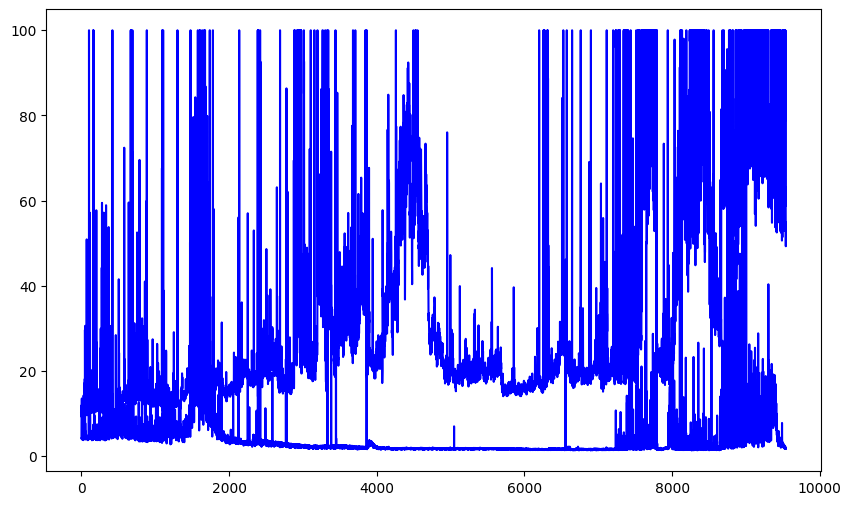

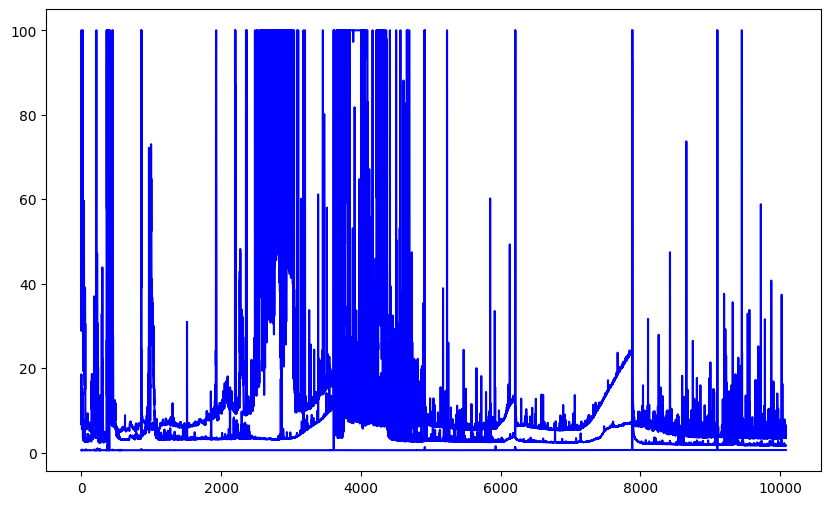

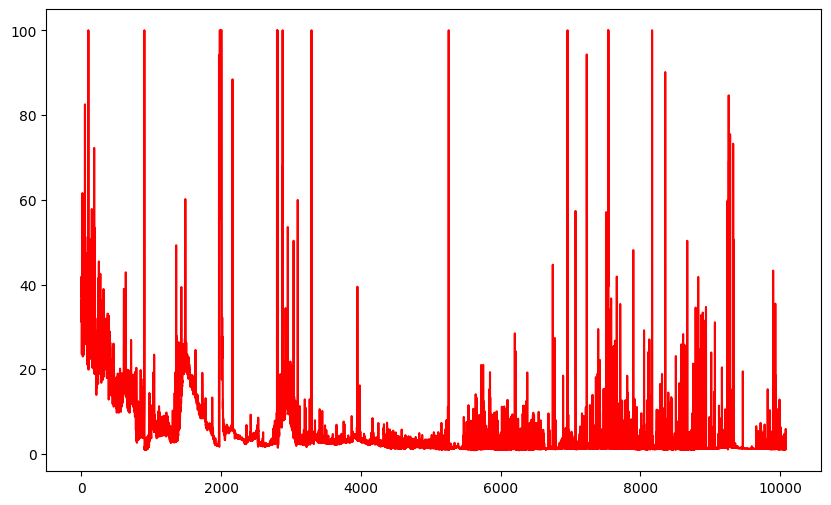

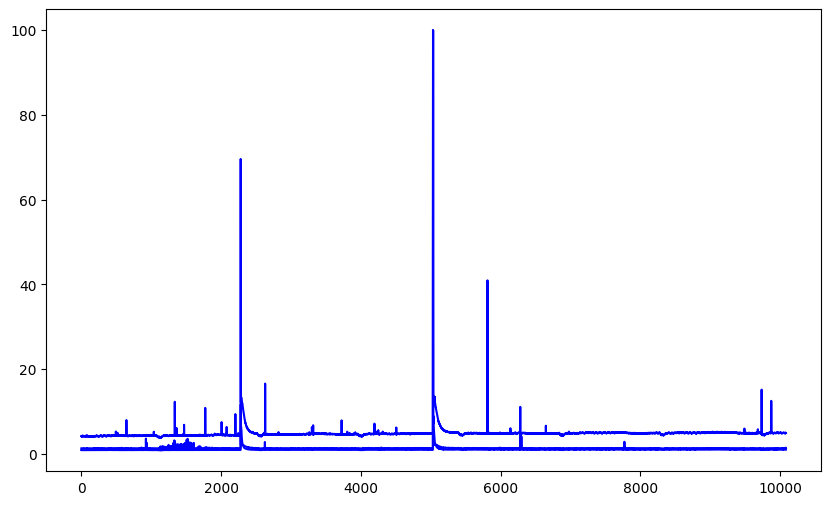

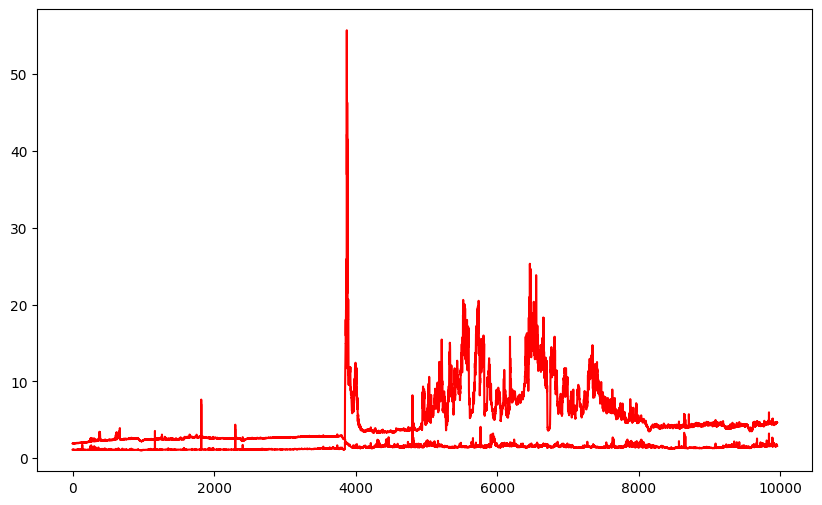

In [103]:
organoids = ["O9-12", "O13-16", "O21-24"]

for batch_id, batch_dict in data_dict.items():

    plt.figure(figsize=(10, 6))  # Create a new figure for each batch
    is_organoid = batch_id in organoids

    for org_id, data_tuple in batch_dict.items():
        trace = data_tuple[0] * 1000
        error = data_tuple[1] * 1000

        trace[trace > 100] = 100

        if is_organoid:
            plt.plot(trace, 'b')
        else:
            plt.plot(trace, 'r')


        


In [36]:
# Filter Line Plots (time vs valid channels)

# input = 2 layer dict [batch, days]
# output = 4x1 figure (each organoid) with drug conditions labeled on x-axis

# make session dict
batch_ids = ["O9-12", "O13-16", "O17-20", "O21-24", "O25-28"]

session = {}
for batch_id in batch_ids:
    session[batch_id] = {}

    recording_start = get_drug_times(batch_id, "Control")[0]
    recording_end = get_drug_times(batch_id, "Tetrodotoxin")[1]

    # Iterate through the range of dates
    date_list = []
    date = recording_start.date()
    while date <= recording_end.date():
        # Append the date part of the datetime object to the list
        date_list.append(date)
        # Increment the current datetime by one day
        date += datetime.timedelta(days=1)
    
    for date in date_list:

        if date == date_list[0]:
            session[batch_id][date] = (recording_start, recording_start+datetime.timedelta(minutes=1))

        elif date == date_list[-1]:
            session[batch_id][date] = (recording_end-datetime.timedelta(minutes=1), recording_end)

        else:
            session[batch_id][date] = (datetime.datetime.combine(date, datetime.time(hour=2, minute=0)), datetime.datetime.combine(date, datetime.time(hour=2, minute=1)))

In [37]:
processed_data_dir = os.path.join(os.getcwd(), "processed_data")
data = get_data_dict(session, processed_data_dir, get_impedance_values=True)

O9-12:
2023-05-03:
Processing 230503.npz
2023-05-04:
Processing 230504.npz
2023-05-05:
Processing 230505.npz
2023-05-06:
Processing 230506.npz
2023-05-07:
Processing 230507.npz
2023-05-08:
Processing 230508.npz
2023-05-09:
Processing 230509.npz
2023-05-10:
Processing 230510.npz
2023-05-11:
Processing 230511.npz
2023-05-12:
Processing 230512.npz
2023-05-13:
Processing 230513.npz
2023-05-14:
Processing 230514.npz
2023-05-15:
Processing 230515.npz
2023-05-16:
Processing 230516.npz
2023-05-17:
Processing 230517.npz
2023-05-18:
Processing 230518.npz
2023-05-19:
Processing 230519.npz
O13-16:
2023-05-25:
Processing 230525.npz
2023-05-26:
Processing 230526.npz
2023-05-27:
Processing 230527.npz
2023-05-28:
Processing 230528.npz
2023-05-29:
Processing 230529.npz
2023-05-30:
Processing 230530.npz
2023-05-31:
Processing 230531.npz
2023-06-01:
Processing 230601.npz
2023-06-02:
Processing 230602.npz
2023-06-03:
Processing 230603.npz
2023-06-04:
Processing 230604.npz
2023-06-05:
Processing 230605.npz

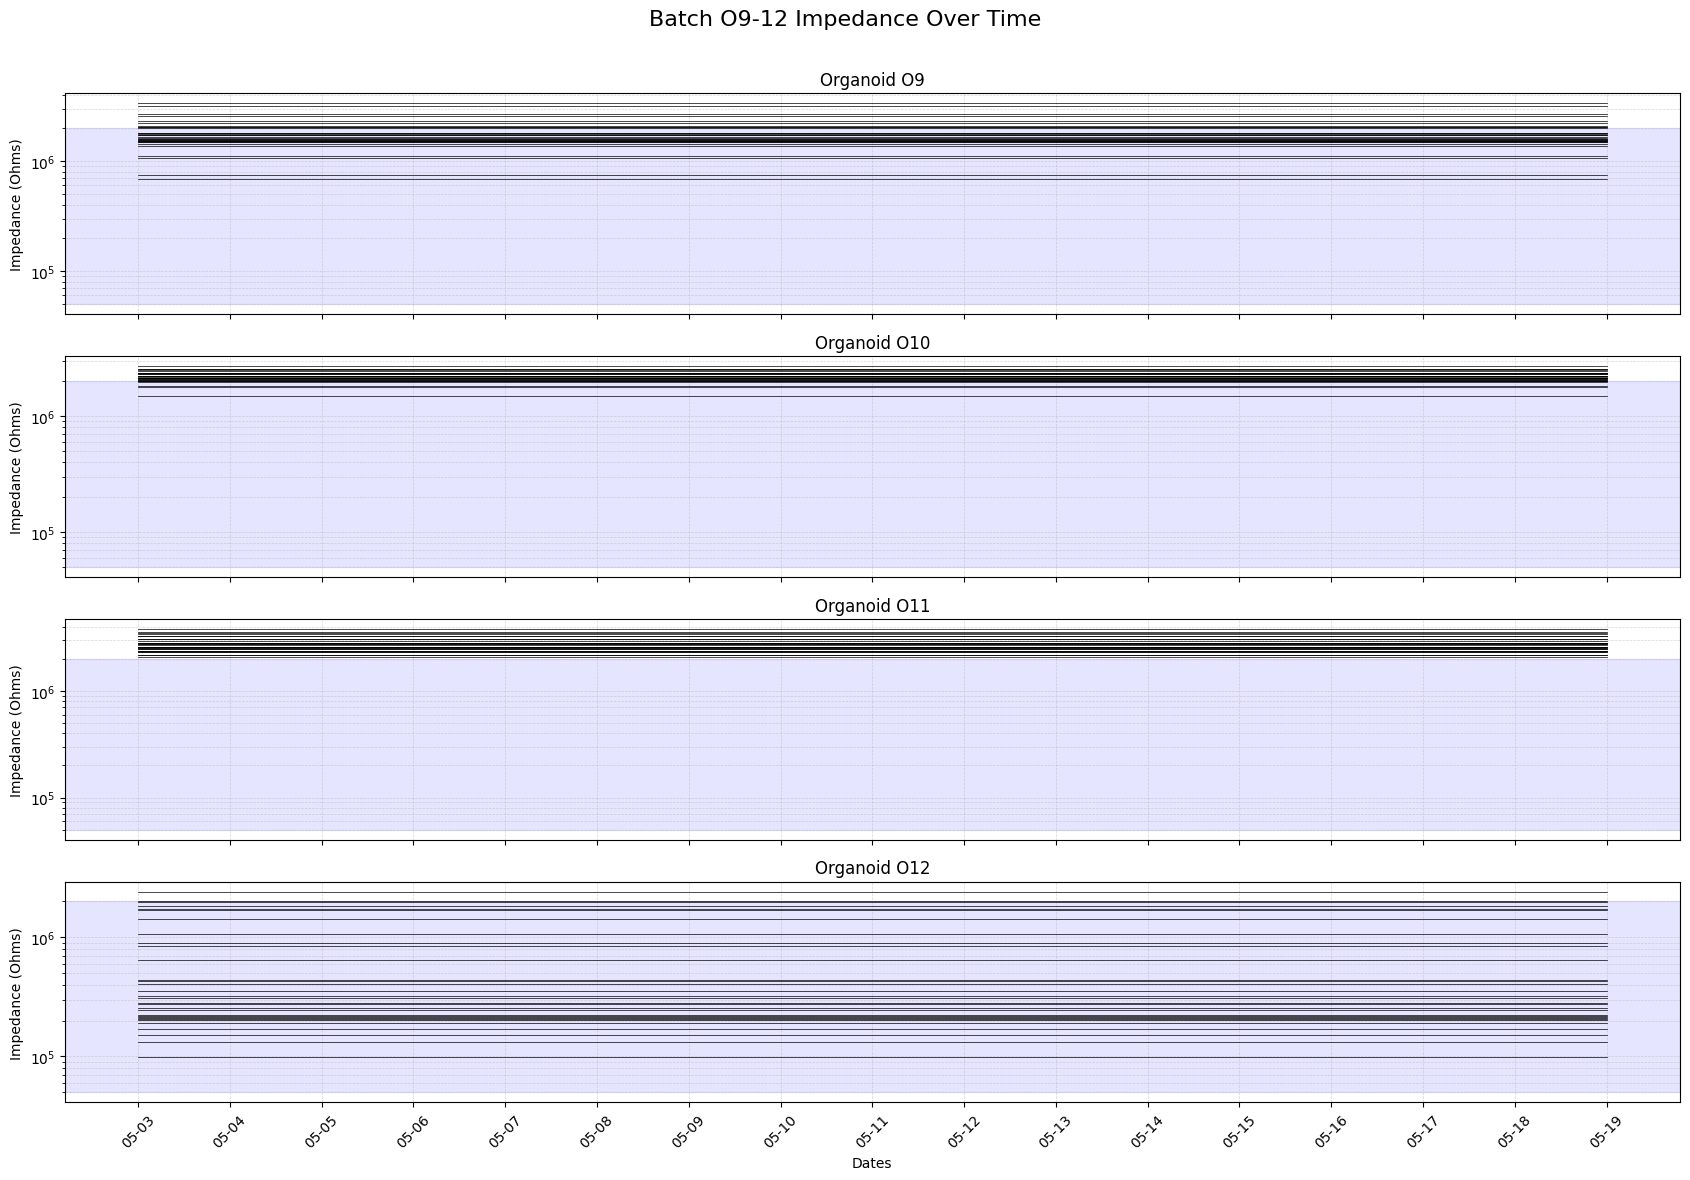

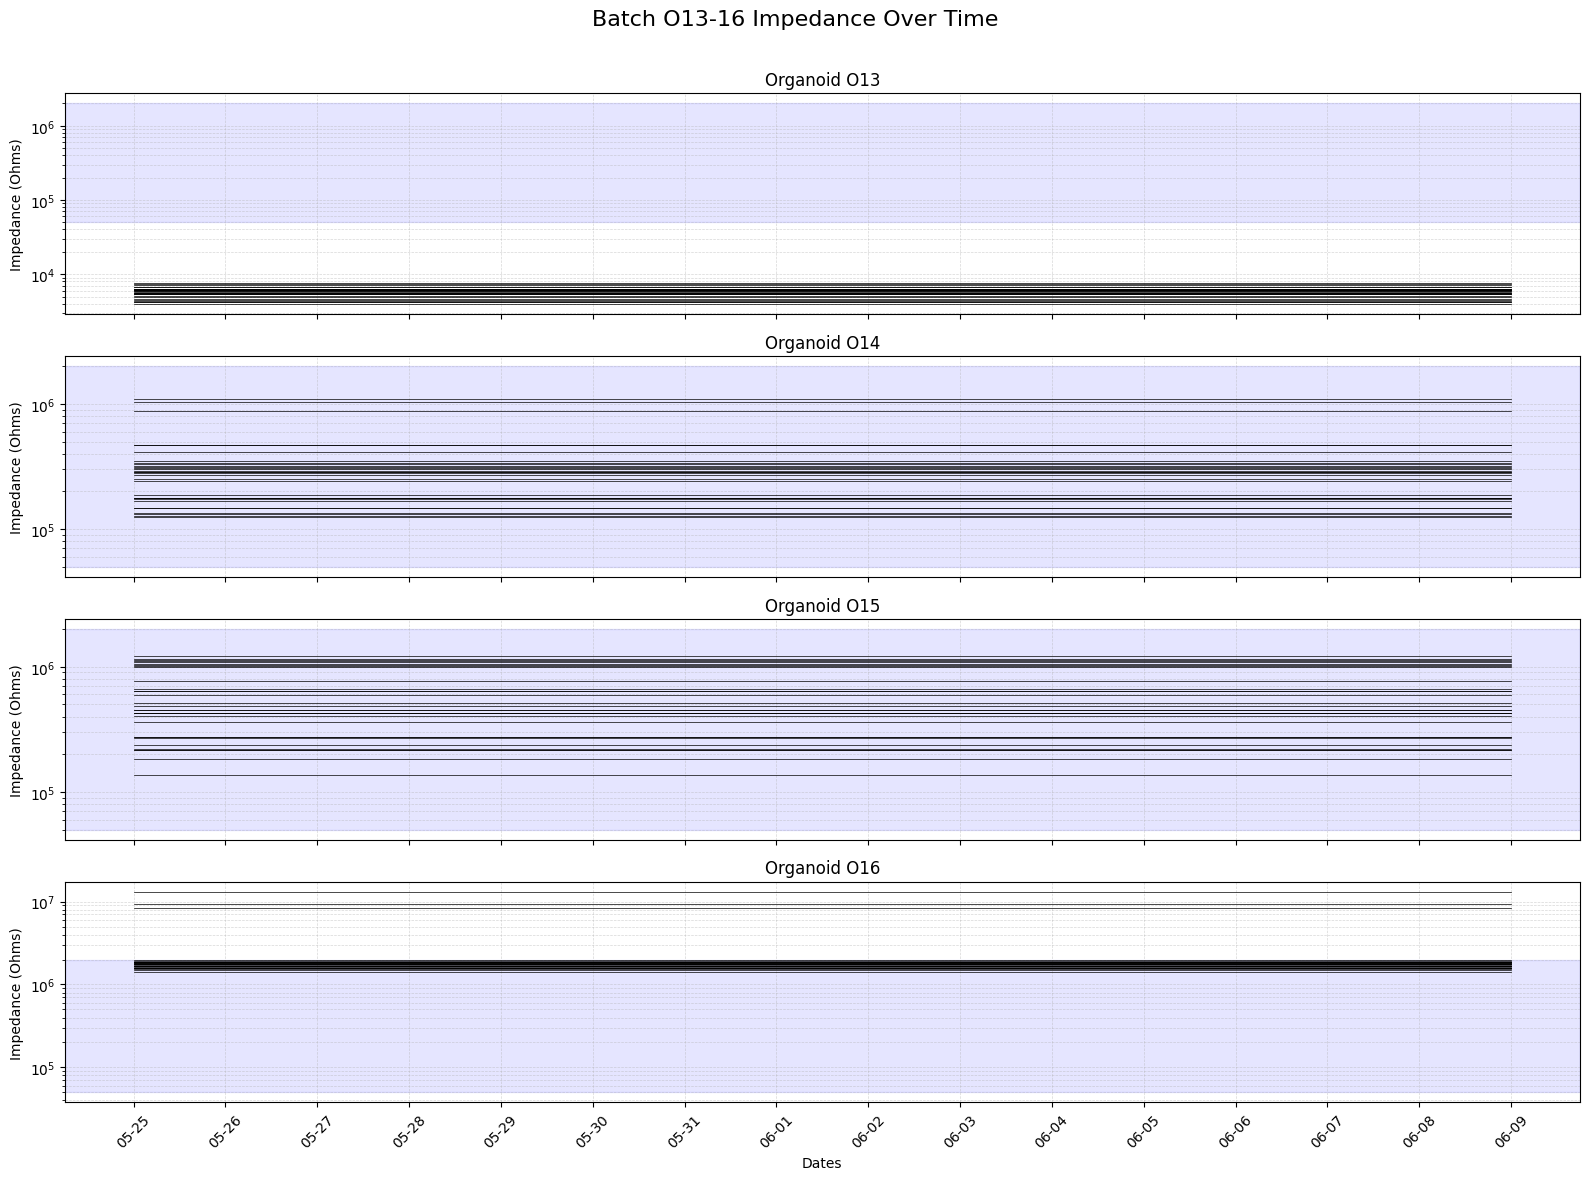

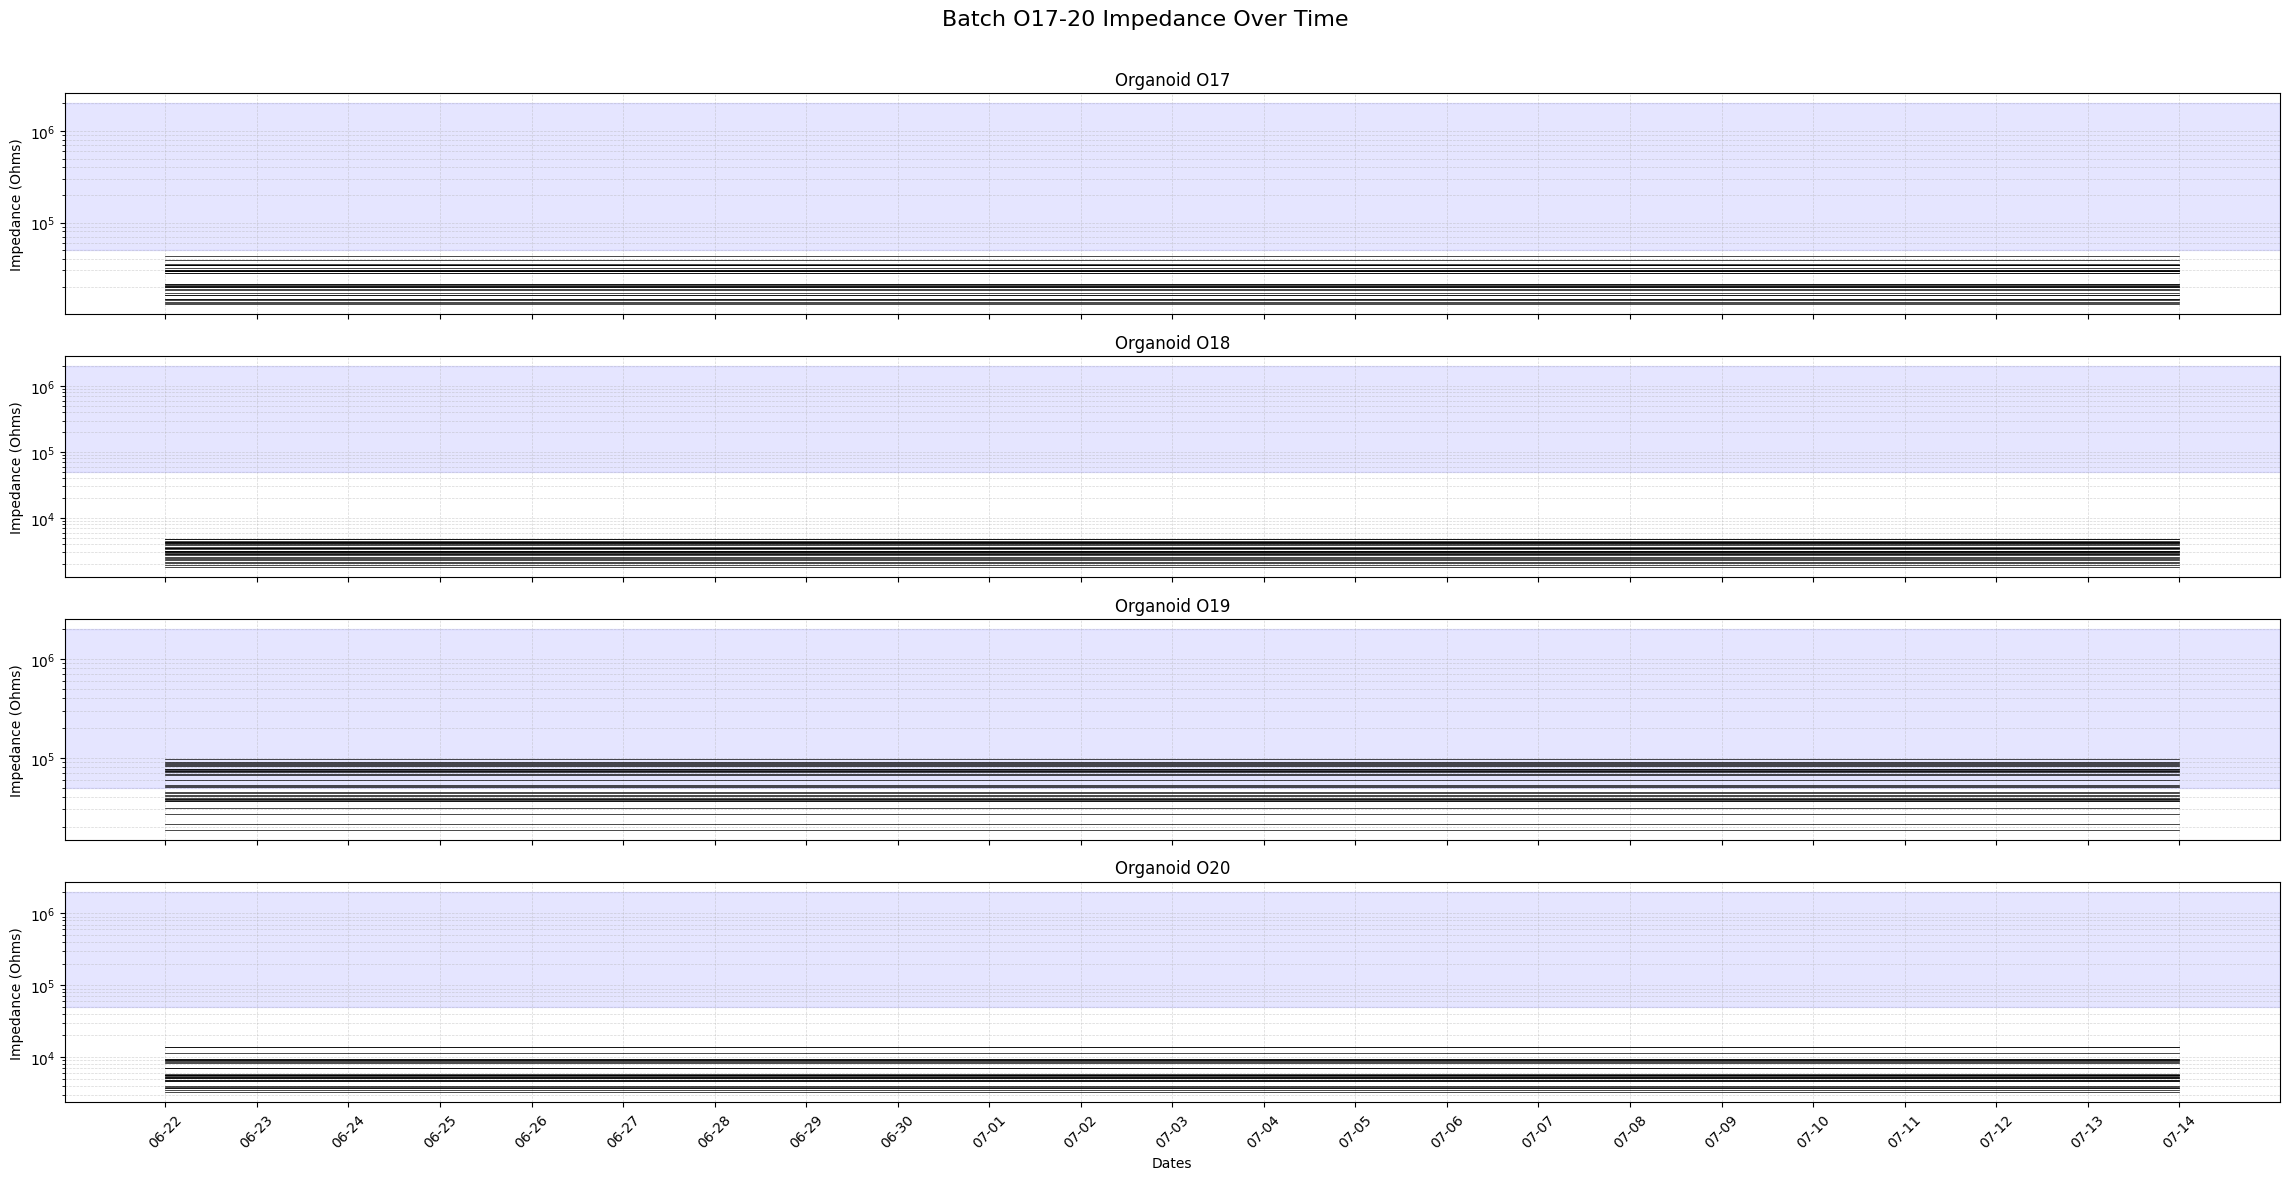

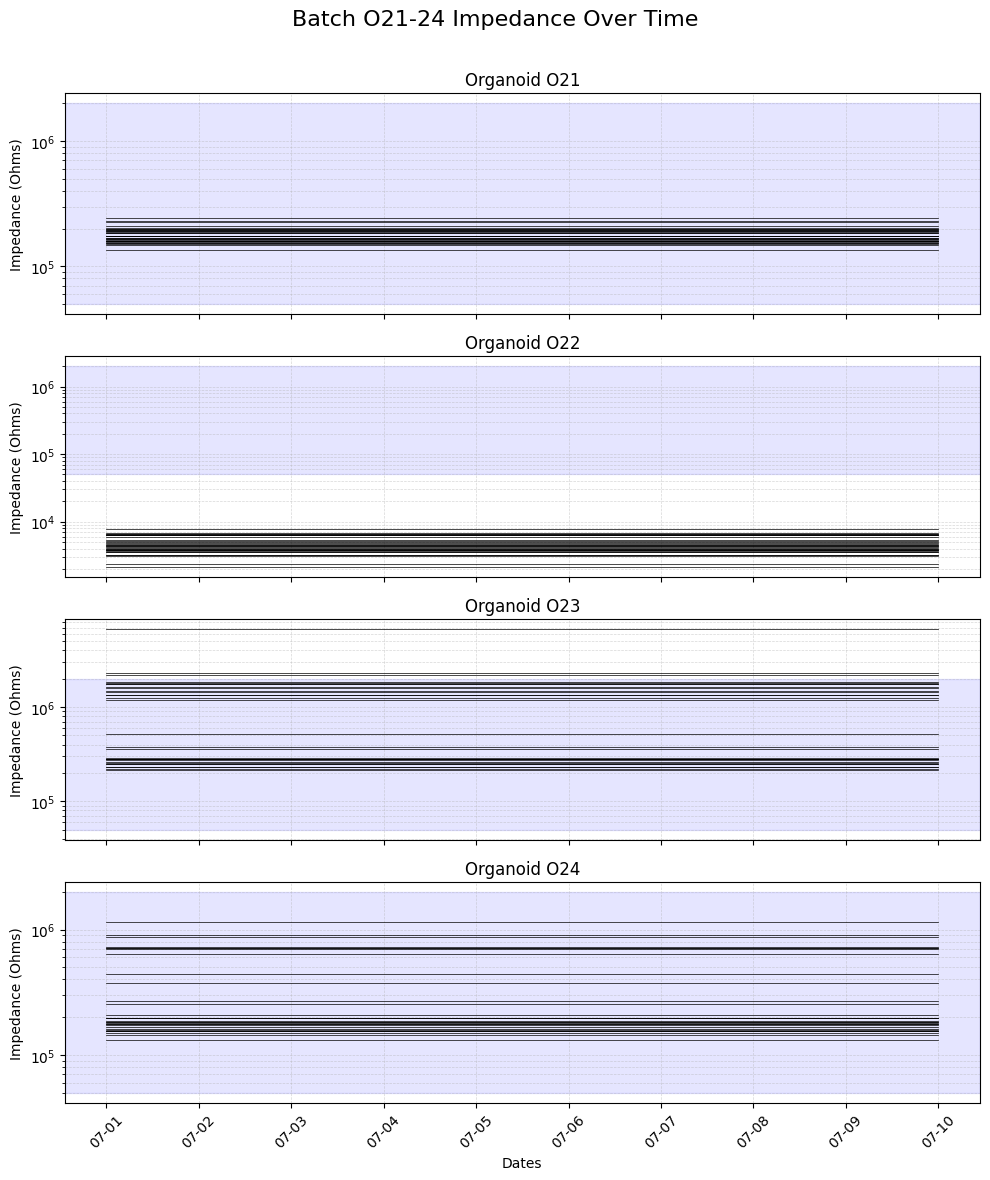

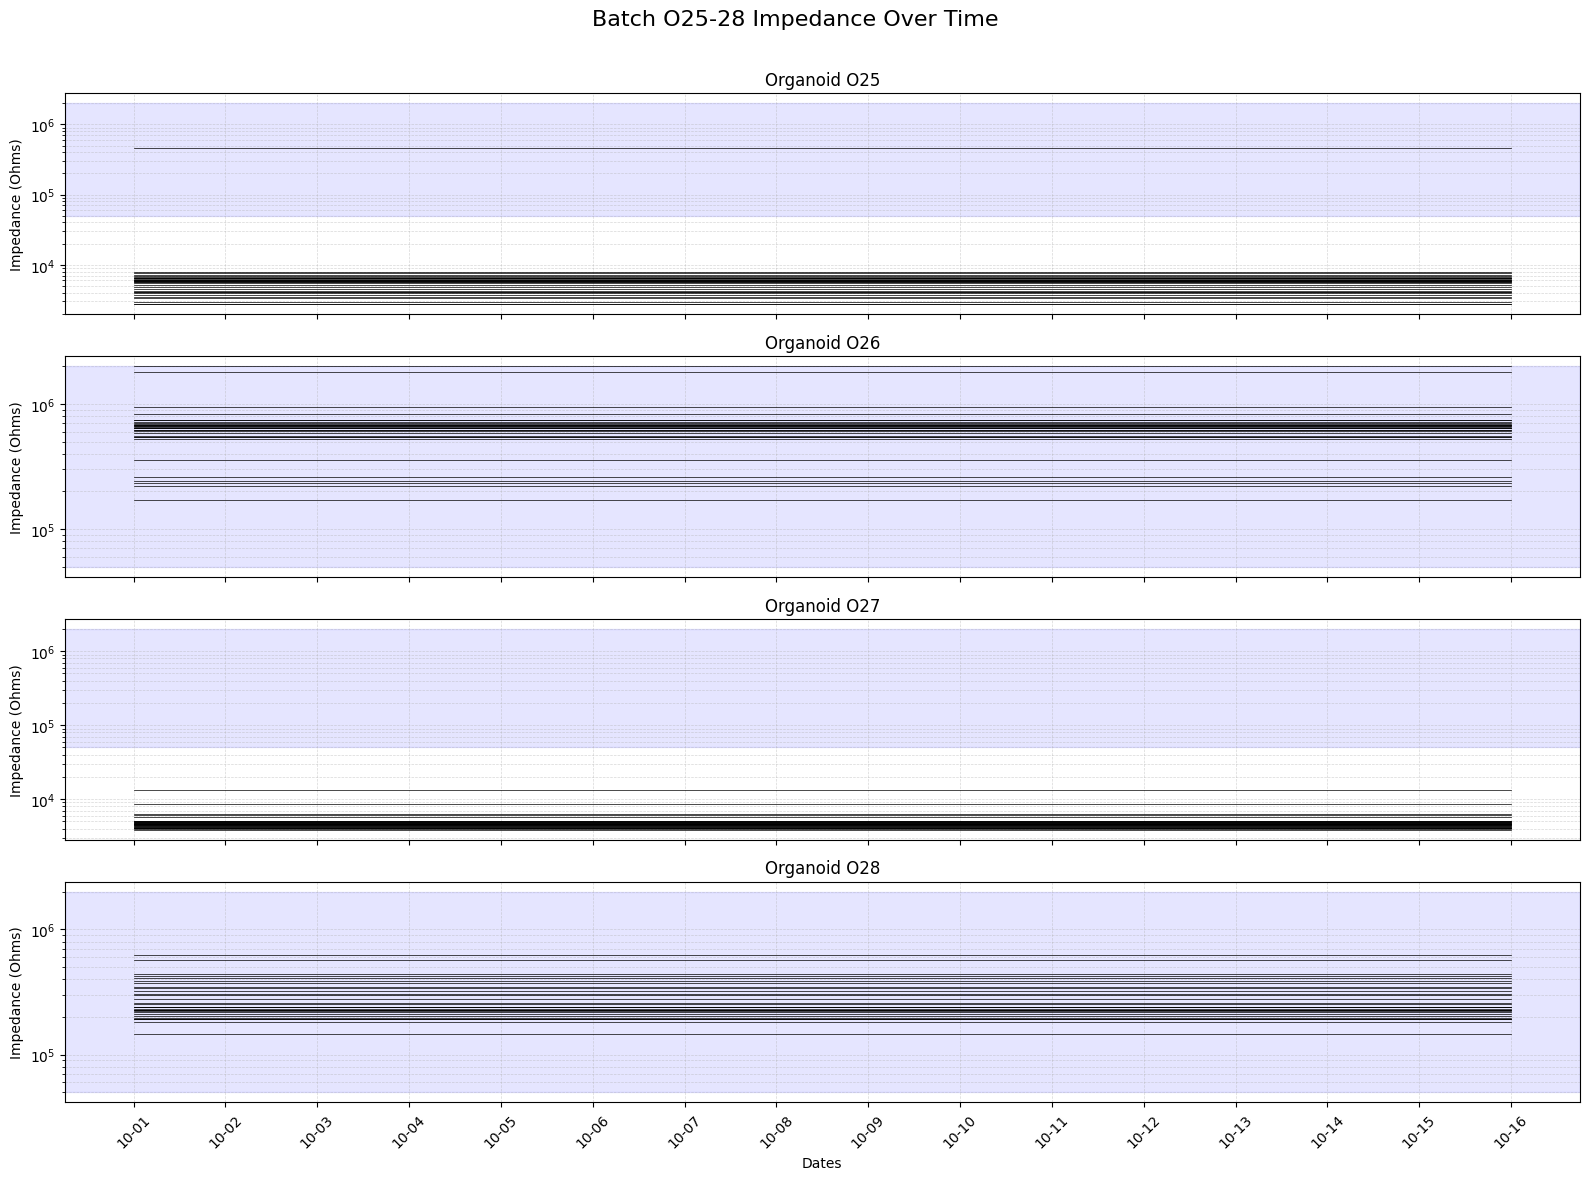

In [51]:


xlabel = "Dates"
ylabel = "Impedance (Ohms)"

linecolor = "k"
linewidth = .5
yscale = "log"

I1 = 50000
I2 = 2000000
shadecolor = "b"
shade_alpha = 0.1  # Transparency for shaded region

for batch_id, batch_dict in data.items():
    organoids = get_organoid_ids(batch_id)  # List of 4 organoid IDs
    
    # Sort dates to ensure proper x-axis order
    dates = sorted(batch_dict.keys())
    xticklabels = [date.strftime("%m-%d") for date in dates]
    num_dates = len(dates)
    
    # Stack all impedance values for this batch into a 4x32xN array
    impedance_all = np.stack([batch_dict[date][:,:,0] for date in dates], axis=-1)  # shape: (4, 32, N)
    
    fig, axs = plt.subplots(4, 1, figsize=(num_dates*1, 12), sharex=True)
    fig.suptitle(f"Batch {batch_id} Impedance Over Time", fontsize=16)
    
    for i in range(4):  # For each organoid
        ax = axs[i]
        for ch in range(32):
            ax.plot(
                range(num_dates), 
                impedance_all[i, ch, :], 
                color=linecolor, 
                linewidth=linewidth
            )
        
        # Add shaded region
        ax.axhspan(I1, I2, color=shadecolor, alpha=shade_alpha)
        
        ax.set_yscale(yscale)
        ax.set_ylabel(ylabel)
        ax.set_title(f"Organoid {organoids[i]}")
        ax.grid(True, which='both', ls='--', lw=0.5, alpha=0.5)
    
    axs[-1].set_xticks(range(num_dates))
    axs[-1].set_xticklabels(xticklabels, rotation=45)
    axs[-1].set_xlabel(xlabel)
    
    plt.tight_layout(rect=[0, 0, 1, 0.97])  # Leave space for suptitle
    plt.show()





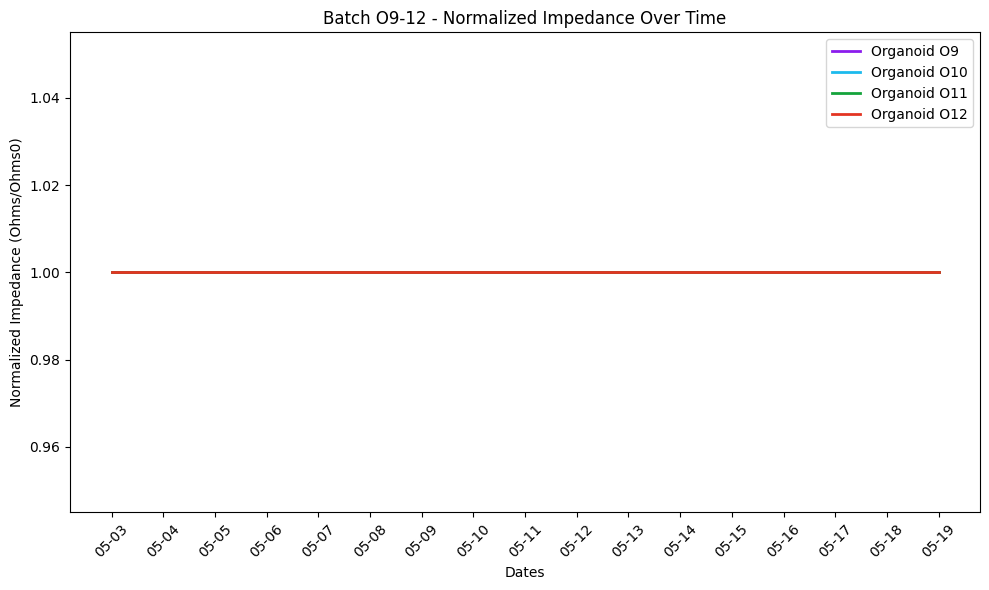

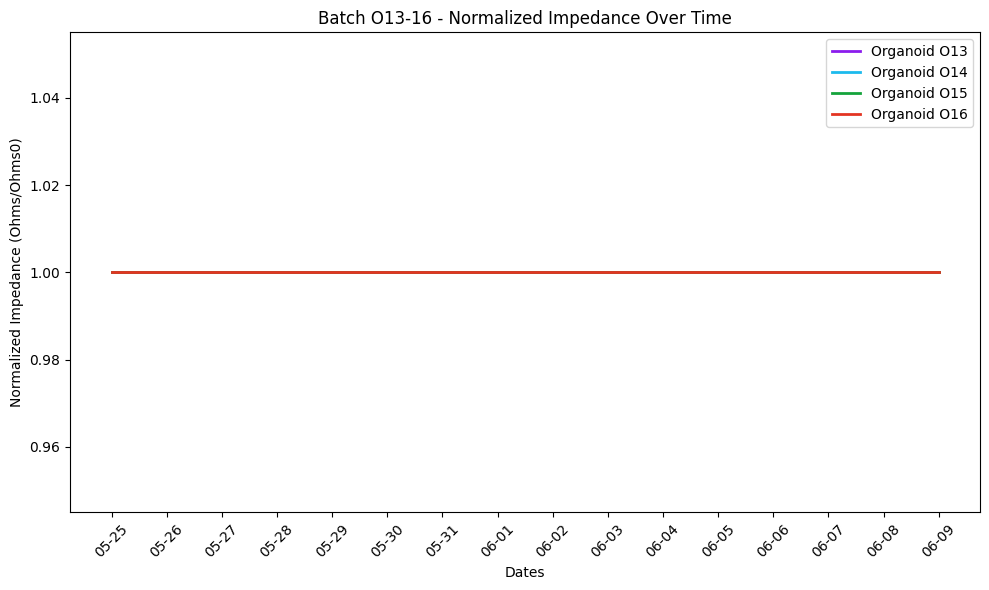

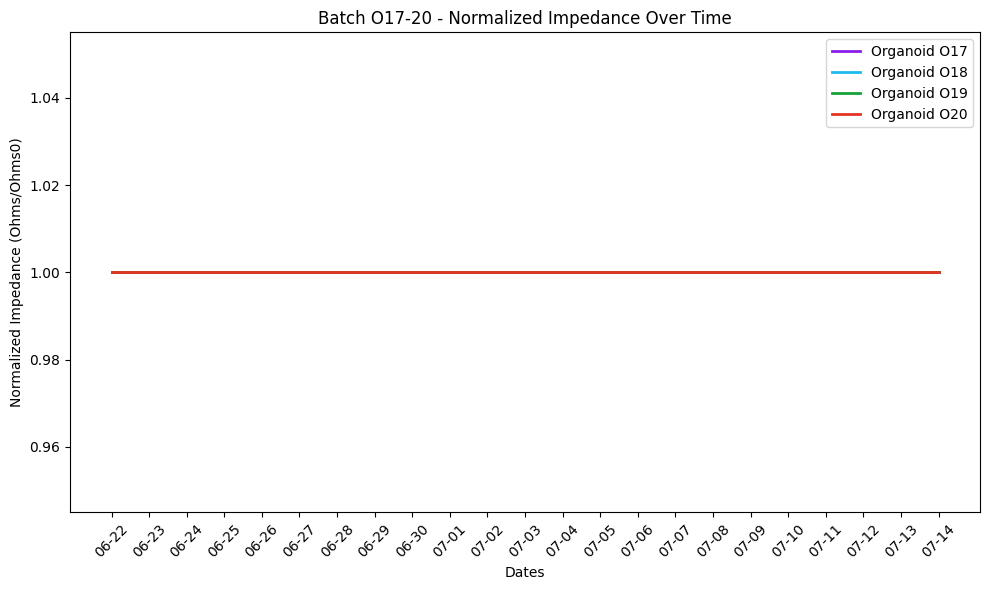

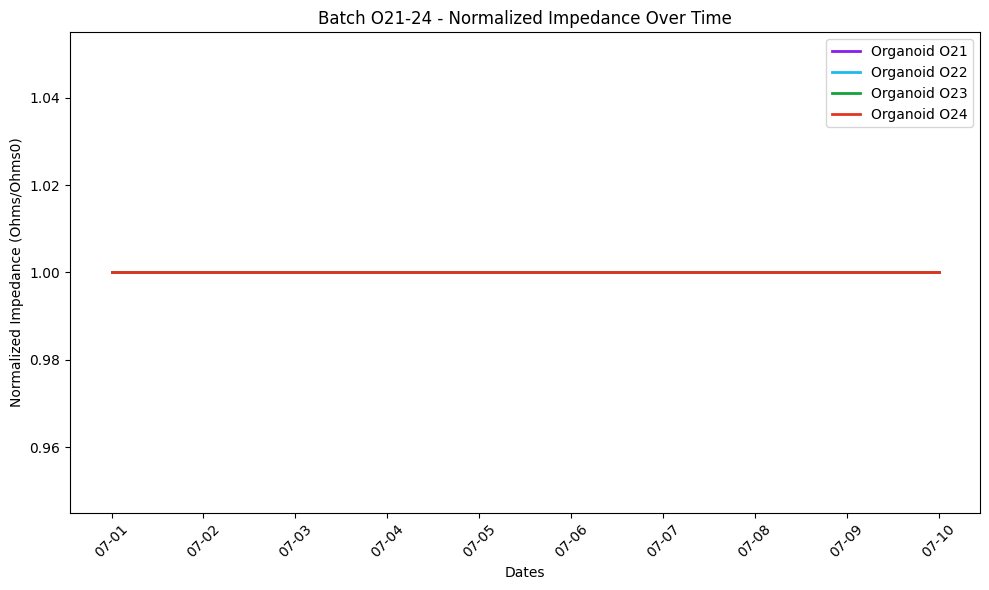

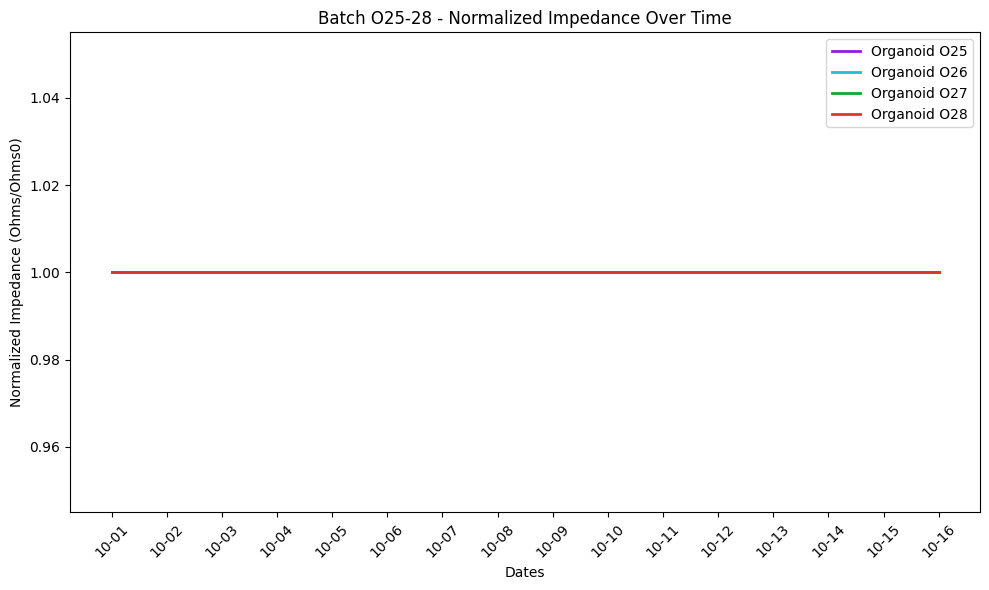

In [59]:
import numpy as np
import matplotlib.pyplot as plt

xlabel = "Dates"
ylabel = "Normalized Impedance (Ohms/Ohms0)"

# For organoid plotting (line and shading)
linecolor = ["#8b1ced", "#1cbaed", "#14a33b", "#e33422"]
linewidth = 2
yscale = "log"
shade_alpha1 = 0.3

# For impedance shading (not used in this plot, but kept for completeness)
I1 = 50000
I2 = 2000000
shadecolor2 = "k"
shade_alpha2 = 0.1

for batch_id, batch_dict in data.items():
    organoids = get_organoid_ids(batch_id)  # List of 4 organoid IDs
    dates = sorted(batch_dict.keys())
    xticklabels = [date.strftime("%m-%d") for date in dates]
    num_dates = len(dates)
    
    # Stack all impedance values for this batch into a 4x32xN array
    impedance_all = np.stack([batch_dict[date][:,:,0] for date in dates], axis=-1)  # shape: (4, 32, N)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    for org_idx, org_id in enumerate(organoids):
        # Shape: (32, N)
        org_imp = impedance_all[org_idx, :, :]  # Channels x Dates
        
        # Normalize by mean at first date for each channel
        norm_org_imp = org_imp / org_imp[:, [0]]
        
        # Mean and SEM across channels for each date
        mean_norm = np.nanmean(norm_org_imp, axis=0)
        sem_norm = np.nanstd(norm_org_imp, axis=0) / np.sqrt(org_imp.shape[0])
        
        # Plot mean line
        ax.plot(
            range(num_dates), mean_norm, 
            color=linecolor[org_idx], 
            linewidth=linewidth, 
            label=f"Organoid {org_id}"
        )
        # Plot shaded SEM
        ax.fill_between(
            range(num_dates), 
            mean_norm - sem_norm, 
            mean_norm + sem_norm, 
            color=linecolor[org_idx], 
            alpha=shade_alpha1
        )
    
    # ax.set_yscale(yscale)
    ax.set_xticks(range(num_dates))
    ax.set_xticklabels(xticklabels, rotation=45)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(f"Batch {batch_id} - Normalized Impedance Over Time")
    ax.legend()
    plt.tight_layout()
    plt.show()


In [72]:
org_imp[1,:]

array([275968.21875, 275968.21875, 275968.21875, 275968.21875,
       275968.21875, 275968.21875, 275968.21875, 275968.21875,
       275968.21875, 275968.21875, 275968.21875, 275968.21875,
       275968.21875, 275968.21875, 275968.21875, 275968.21875])

In [70]:
org_imp[:,[0]]

array([[221478.28125 ],
       [275968.21875 ],
       [258104.90625 ],
       [375313.6875  ],
       [211315.0625  ],
       [241119.609375],
       [202301.078125],
       [242380.4375  ],
       [306619.03125 ],
       [192850.453125],
       [193898.140625],
       [385590.90625 ],
       [322930.96875 ],
       [347153.9375  ],
       [253636.921875],
       [573765.      ],
       [621606.3125  ],
       [220372.703125],
       [411741.25    ],
       [438187.28125 ],
       [183621.359375],
       [191631.765625],
       [228316.125   ],
       [342523.15625 ],
       [197198.6875  ],
       [241337.453125],
       [233618.734375],
       [226577.078125],
       [426030.34375 ],
       [301019.1875  ],
       [147164.265625],
       [225993.390625]])